# Sprint 6: Algoritmos de aprendizaje supervisado: Regresión con Boston Housing Data

**<h1>Descripción</h1>** 

**<b><h3>Ejercicios por practicar con regresiones con ScikitLearn a partir de un dataset con información sobre las viviendas del suburbio de Houston.</h3></b>**

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Crear de modelos de regresión con el dataset suministrado, asi como utilizar las métricas para interpretar los resultados.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto. 
 
 **Ejercicio 2** : Comparar en base al MSE y al R2.  

 **Ejercicio 3** : Entrenar utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.
 
 **Ejercicio 4** : Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

 **Ejercicio 5** : No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

</div>

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

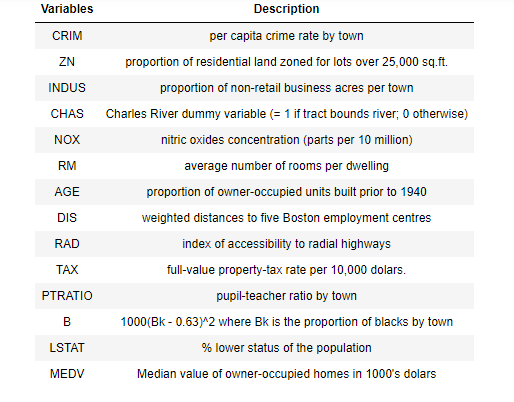

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno

# Import the module for the split
from sklearn.model_selection import train_test_split

#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

#Import the module for the preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h2>Carga del Dataset</h2></b> 
</div>

In [2]:
housing_data= pd.read_csv('housing data.csv',  header=None)
housing_data

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

<h3>Observaciones:</h3>

   *  El dataset posee 506 filas y 14 columnas. 
   *  No posee los nombres de las variables o columnas, por lo que se procederá a colocarle los nombres, de acuerdo a la información suministrada(housing data description).  
   *  Se verificará los tipos las variables. 
   *  Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.   

## 1. Preparación del Dataset

### 1.1. Agregar los nombres de las variables o columnas

In [3]:
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data.columns = header
housing_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 1.2 Verificar nulos y NaM

In [5]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
housing_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* Como se pueden observar no hay valores faltantes ni NAN en el dataset, comprobando la información suministrada. La gráfica msno es una manera visual de verificar la distribucción de los valores faltantes en un dataset. 

<AxesSubplot:>

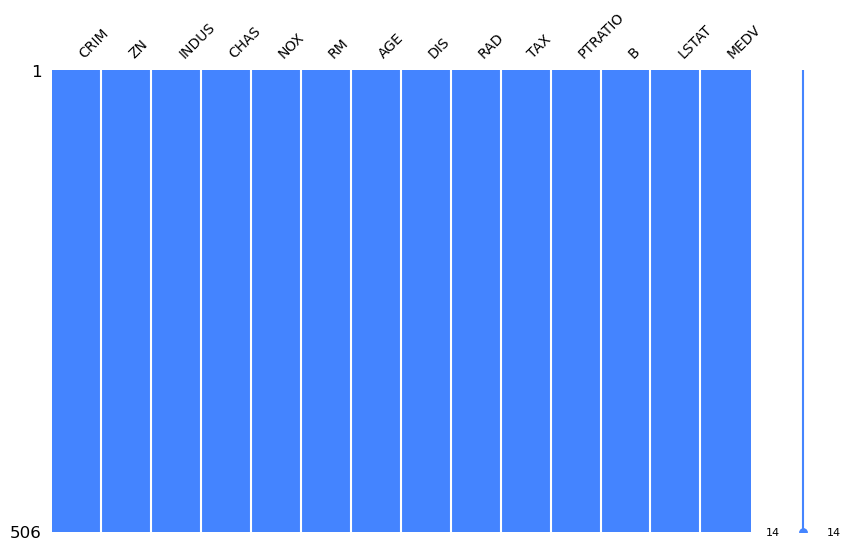

In [7]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(housing_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

### 1.3 Verificar datos duplicados

In [8]:
housing_data[housing_data.duplicated()]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.      

### 1.4 Descripción estadistica y visualización global de las variables.

El atributo MEDV será el target o variable de predicción. 

Se crearán unos gráficos de dispersión de los atributos en función del atributo MEDV para ver su relación.

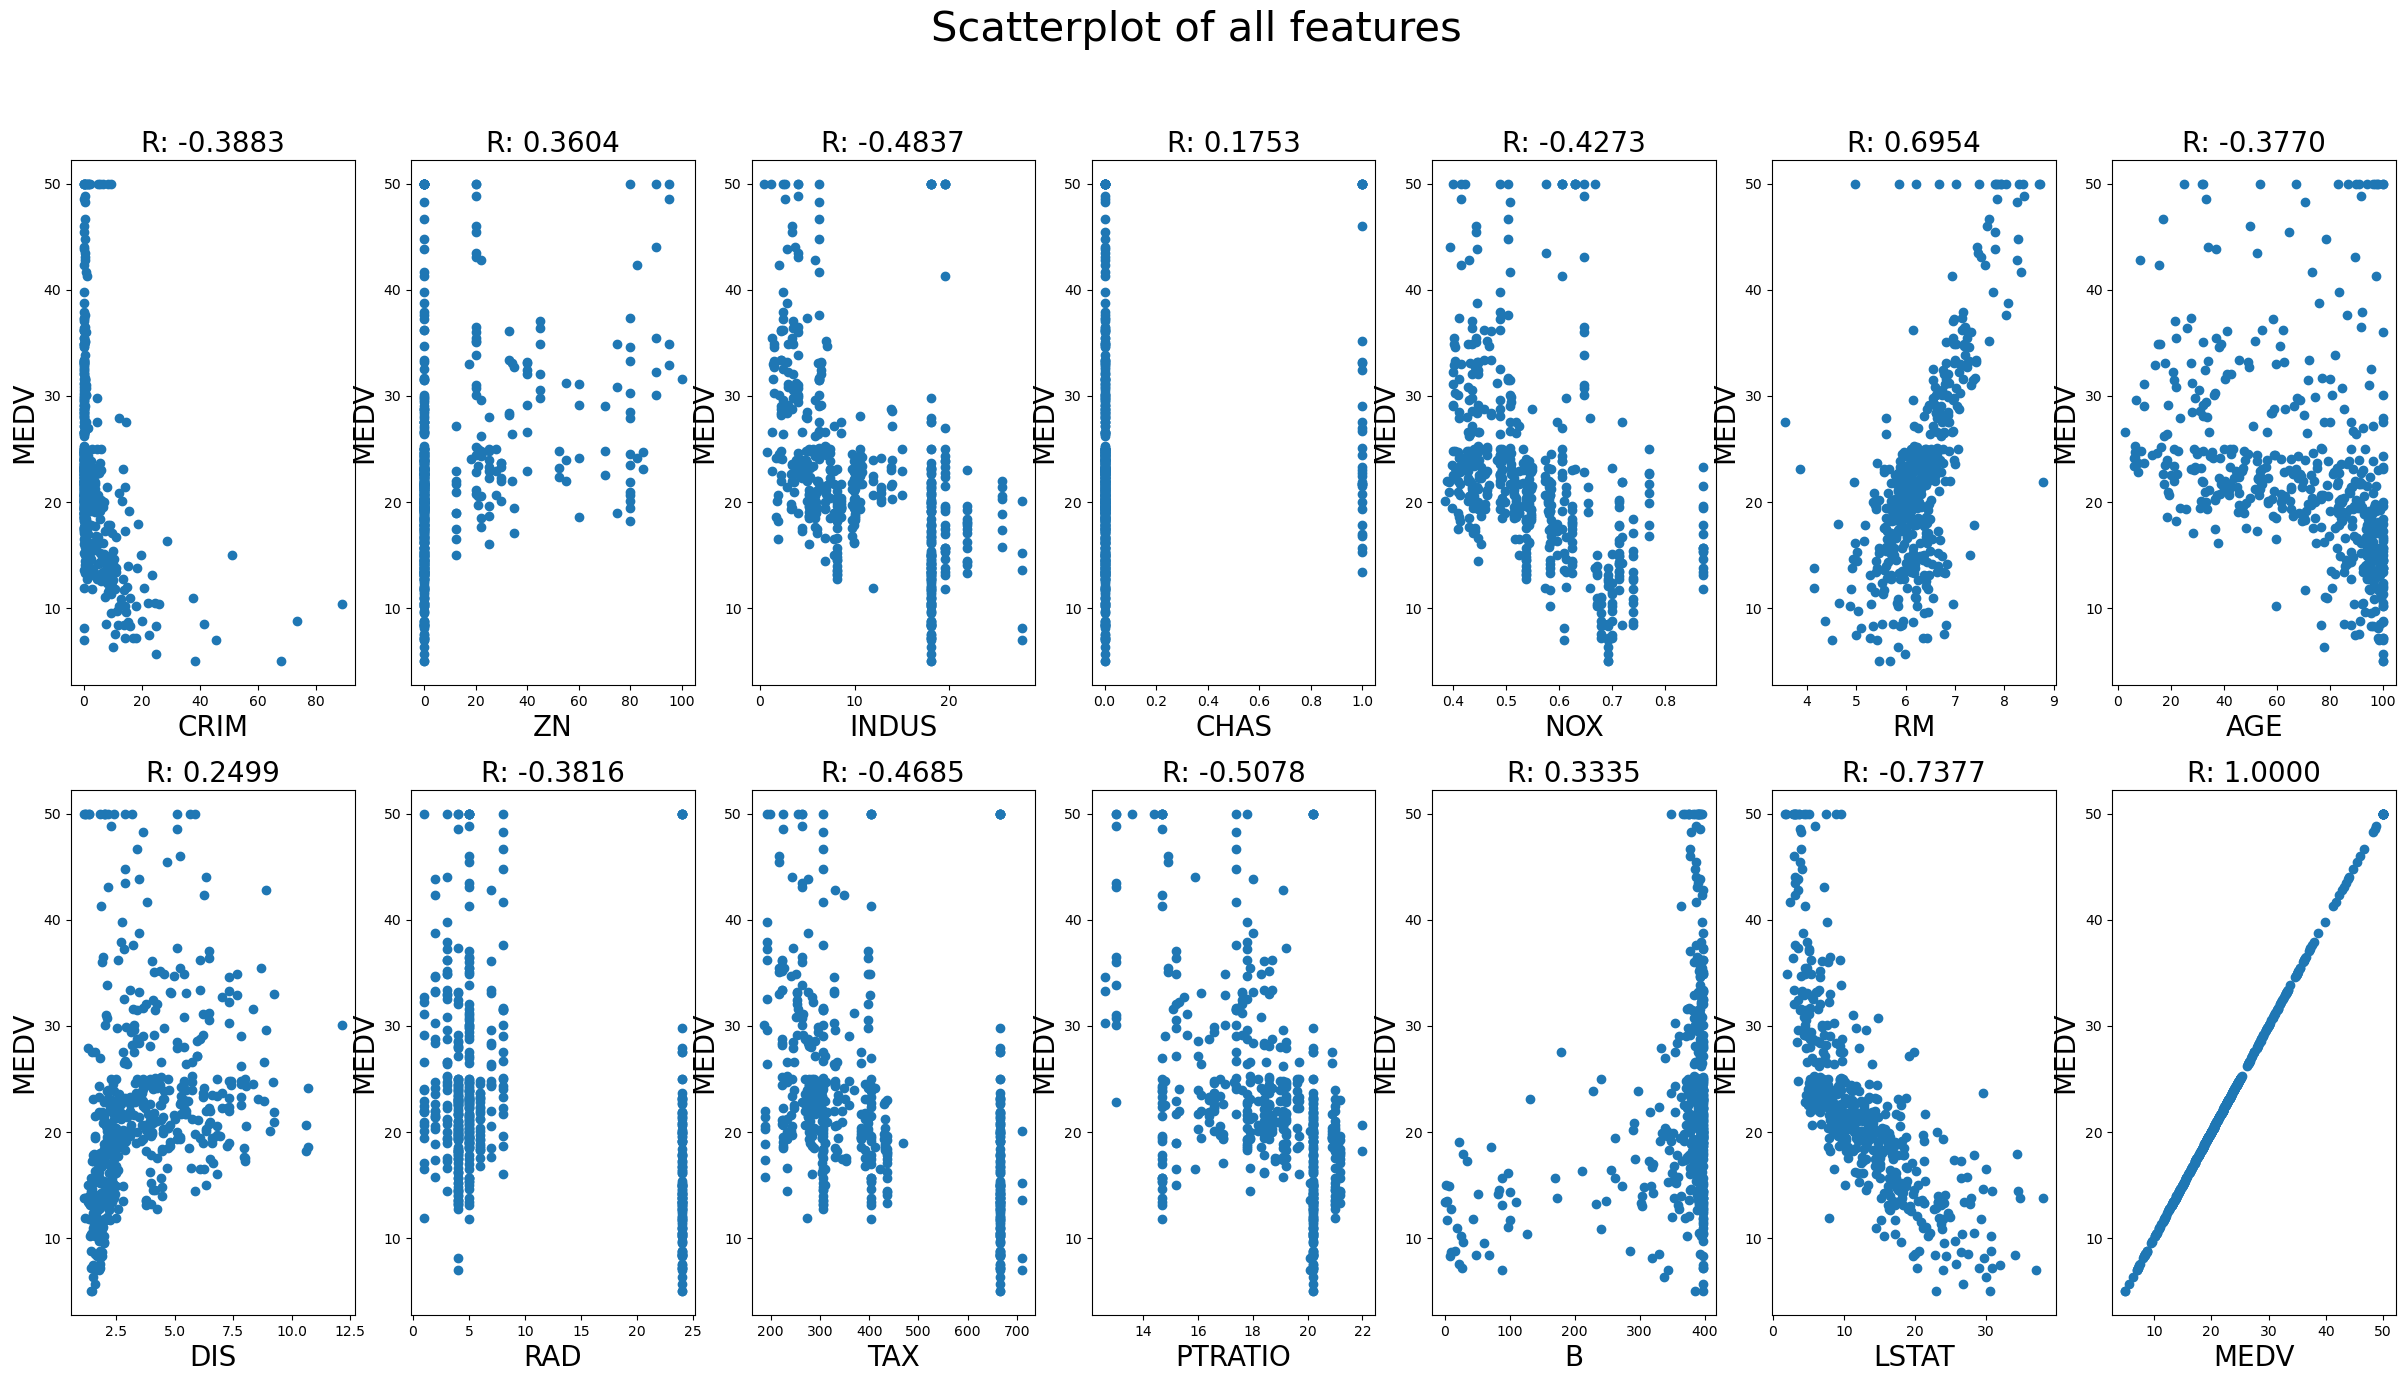

In [9]:
## Column indexer
col_idx = 0

## Create plots with seven columns and two rows
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(30,15))

## Loop through each subplot to make scatterplot 
for i in range(2):
      for j in range(7):
        col = housing_data.iloc[:,col_idx].name
        axes[i, j].plot(housing_data[col], housing_data.MEDV, 'o', color='tab:blue')
        axes[i, j].set_xlabel(housing_data.columns[col_idx], fontsize=20)
        axes[i, j].set_ylabel('MEDV', fontsize=20)
        axes[i, j].set_title('R: {:.4f}'.format(housing_data[['MEDV', col]].corr().iloc[0, 1]), fontsize=20)
        fig.suptitle('Scatterplot of all features', fontsize=30)
        col_idx += 1

* Se observa que muchos atributoss tienen poca correlación con la variable MEDV(Valor medio de las viviendas ocupadas). 
* Los atributos RM y LSTAT, son las que tienen mayor correlación, positiva y negativa respetivamente. 
* Adicionalmente se observa que los atributos  CHAS y RAS tienen valores enteros discretos, el RAD se caracteriza por ser ordinaria categórica, esto significa que estos pueden ser grupos específicos definidos en el conjunto de datos, lo cual se puede ver en el diagrama de dispersión anterior, ya que estas columnas forman líneas rectas verticales.

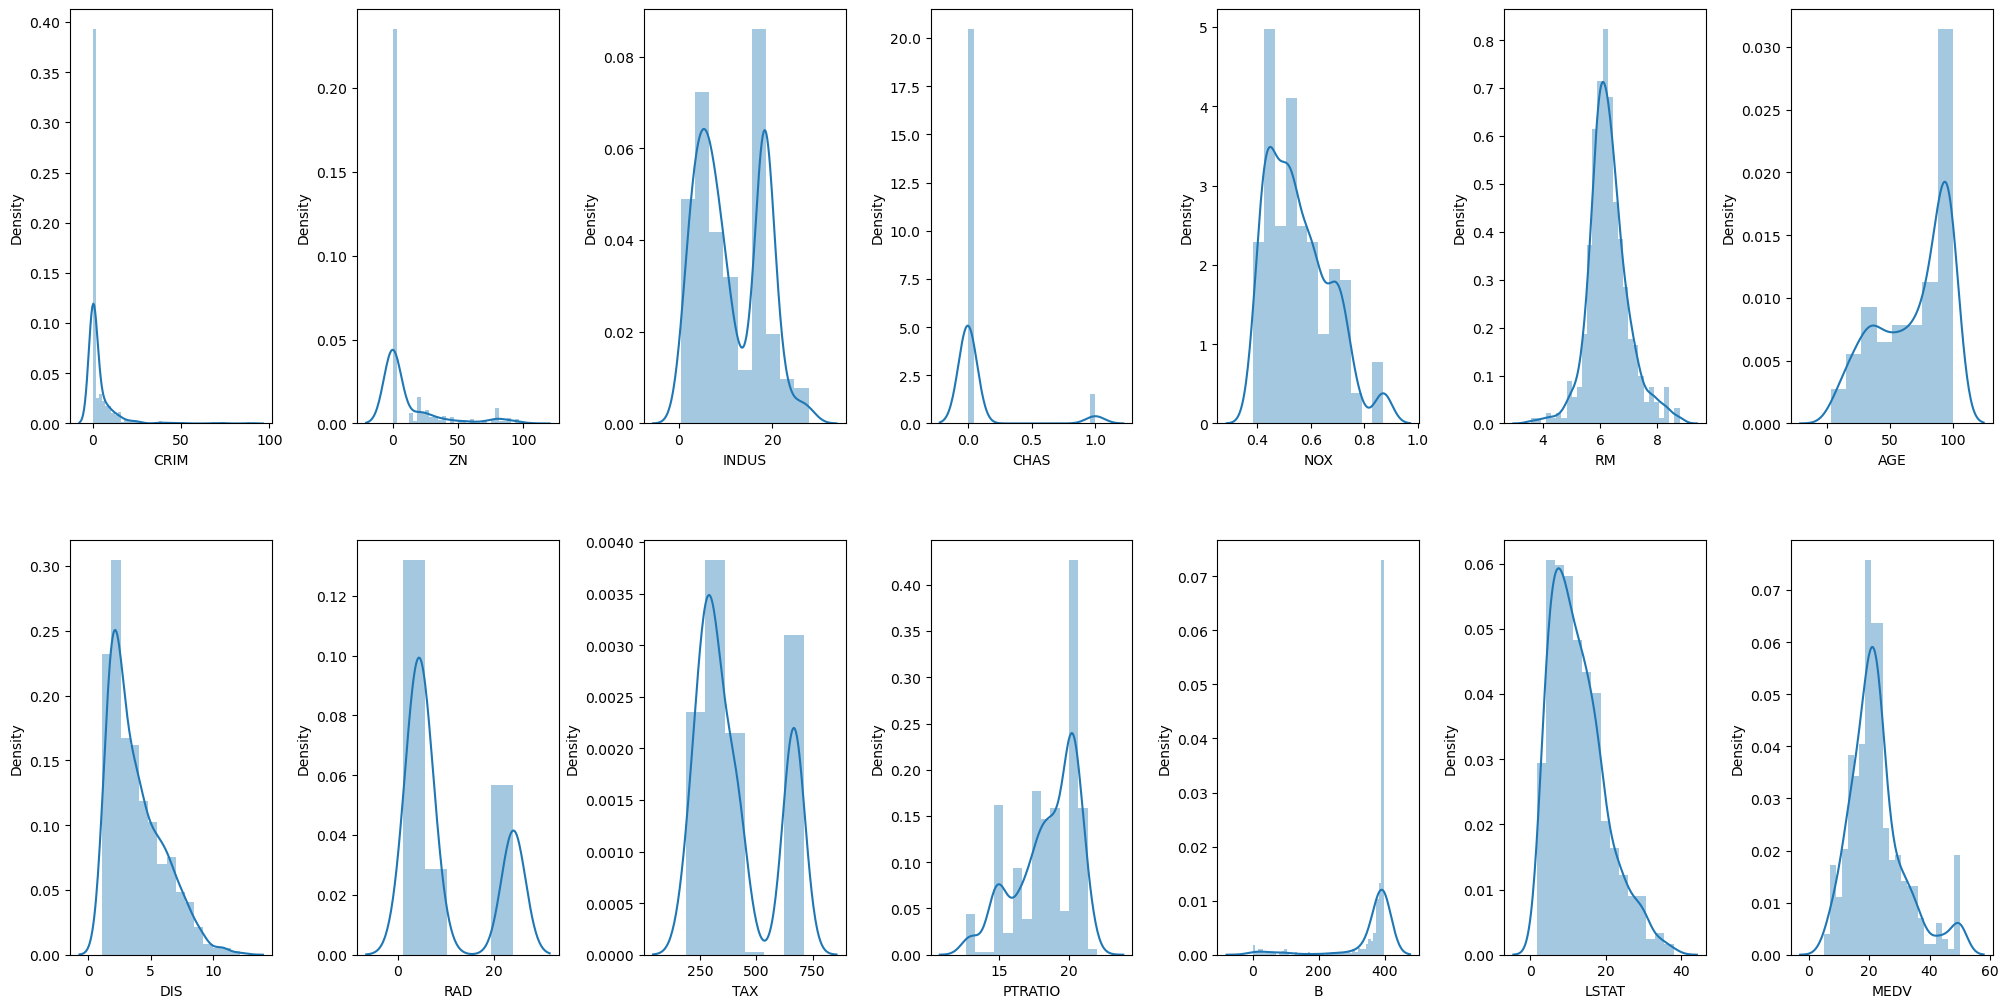

In [10]:
#histogram plots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

El histograma también muestra que las columnas CRIM, ZN, B tienen distribuciones muy asimétricas, mientras que MEDV parece tener una distribución normal (El target). Adicionalmente se puede observar en los atributos LSTATS, CRIM y DIS alto sesgo hacia la izquierda por lo que se podria evaluar la simetria de las variables.

### Verificar la simetria.

In [26]:
housing_data.agg(['skew','kurtosis']).T

skew   kurtosis
CRIM     5.223149  37.130509
ZN       2.225666   4.031510
INDUS    0.295022  -1.233540
NOX      0.729308  -0.064667
RM       0.403612   1.891500
AGE     -0.598963  -0.967716
DIS      1.011781   0.487941
TAX      0.669956  -1.142408
PTRATIO -0.802325  -0.285091
B       -2.890374   7.226818
LSTAT    0.906460   0.493240
MEDV     1.108098   1.495197

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que la distribución de algunos valores sigue distribuciones sesgadas bimodales o izquierda/derecha. Es posible que se necesite aplicar una transformación.
</div>

### Verificar los valores atípicos.

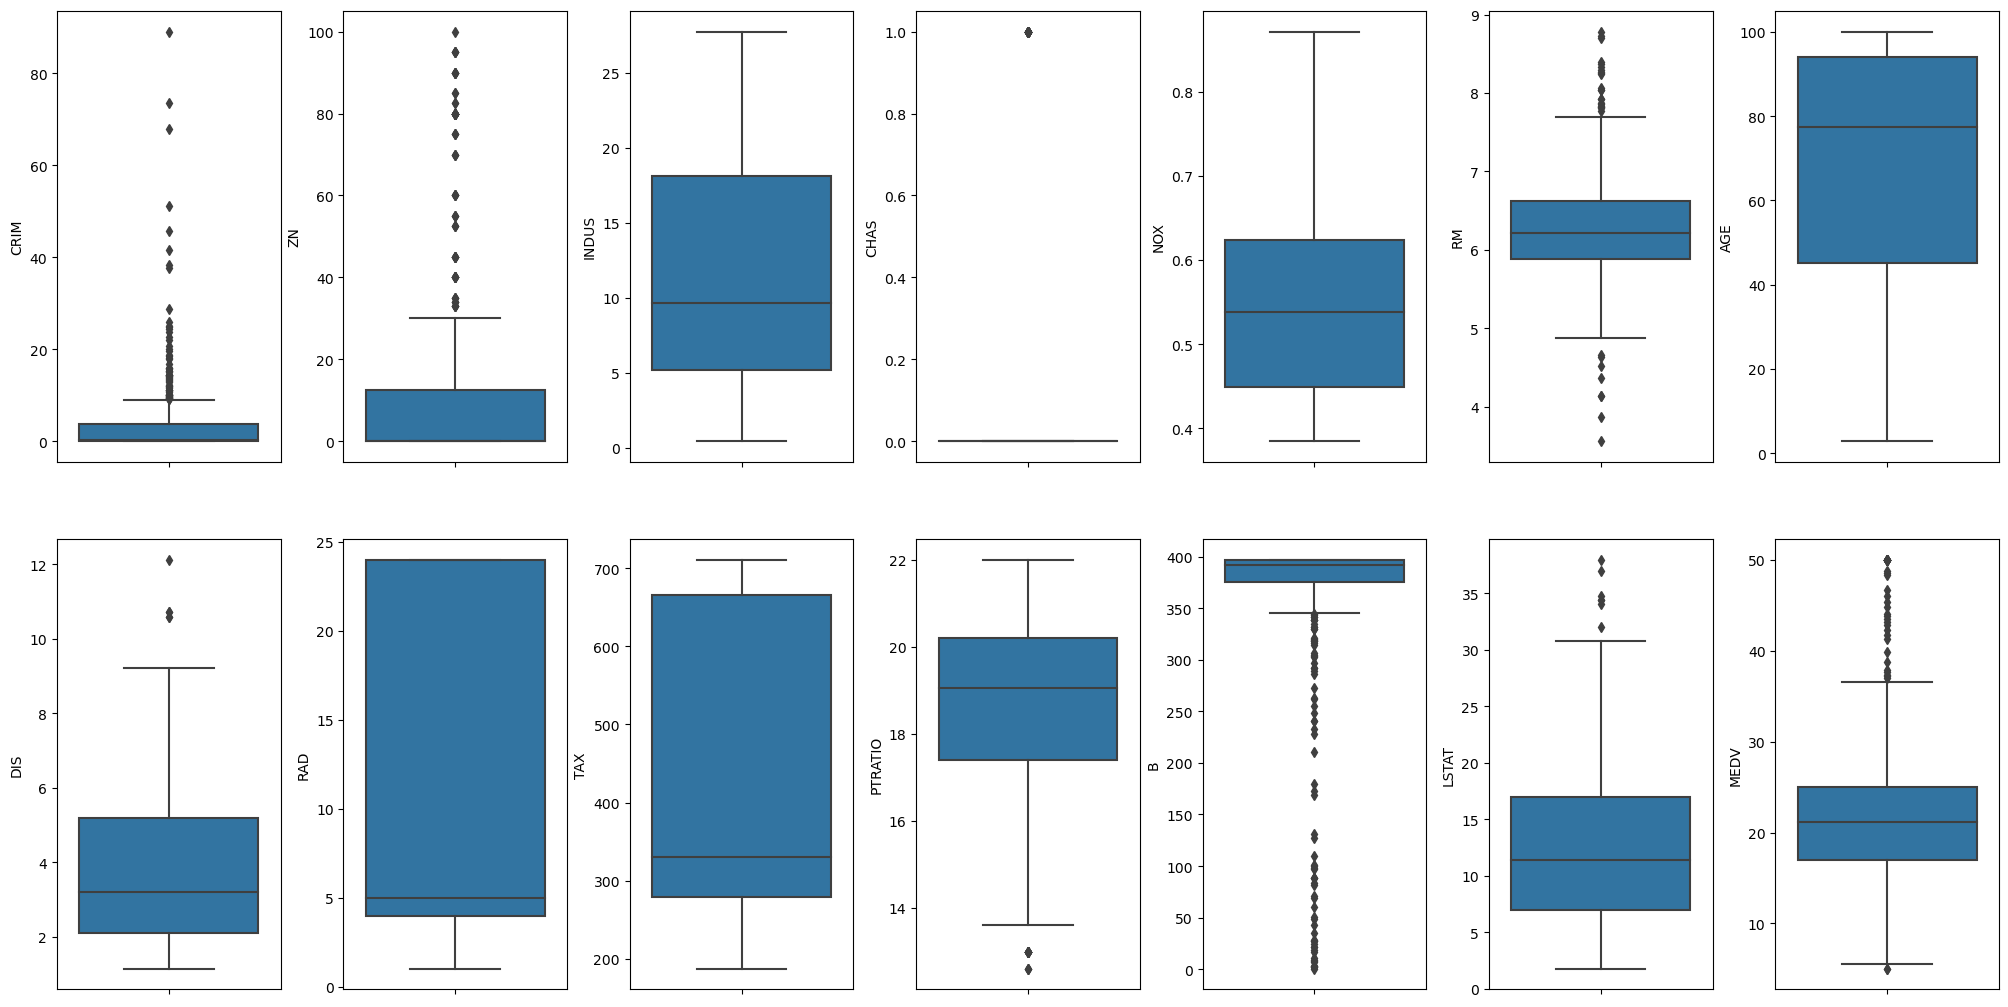

In [14]:
# Se creará un grafico boxplot

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_data.items():
    sns.boxplot(y=k, data=housing_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Se pueden observar que las columnas como CRIM, ZN, RM, B, PTRATIO, LSTAT y MEDV parecen tener altos valores atípicos. Se verificará el % de outliers por atributo o variable.

In [13]:
#% of outliers
for k, v in housing_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(housing_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que los atributos CRIM, ZN, RM, B, PTRATIO, LSTAT y MEDV tienen  valores atípicos, y los % varian entre 1.38% y 15.22%. Se descarta la variable CHAS debido que es una variable categorica. 
</div>

### Análisis de los atributos numéricos (excluyendo CHAS y RAD).

In [15]:
cont_data = housing_data.select_dtypes('float64')
cont_data

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   
..       ...   ...    ...    ...    ...   ...     ...    ...      ...     ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273.0     21.0  391.99   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273.0     21.0  396.90   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273.0     21.0  396.90   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273.0     21.0  393.45   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  273.0     21.0  396.90   

     LSTAT  MEDV  
0     4.98  24.0  
1     9.14  21.6  
2     4.03  34.7  
3     2.94  33.4  
4     5.33  36.2  
..     ...   ...  
501   9.67  22.4  
502   9.08  20.6  
503   5.64  23.9  
504   6.48  22.0  
505   7.88  11.9  

[506 rows x 12 columns]

In [16]:
def estadisticos_num(cont_data):
    #Calculamos describe
    estadisticos = cont_data.describe().round(3).T
    #Añadimos la mediana
    estadisticos['median'] = cont_data.median().round(3)
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [17]:
estadisticos_num(cont_data)

count     mean   median      std      min      25%      50%      75%  \
CRIM     506.0    3.614    0.257    8.602    0.006    0.082    0.257    3.677   
ZN       506.0   11.364    0.000   23.322    0.000    0.000    0.000   12.500   
INDUS    506.0   11.137    9.690    6.860    0.460    5.190    9.690   18.100   
NOX      506.0    0.555    0.538    0.116    0.385    0.449    0.538    0.624   
RM       506.0    6.285    6.208    0.703    3.561    5.885    6.208    6.624   
AGE      506.0   68.575   77.500   28.149    2.900   45.025   77.500   94.075   
DIS      506.0    3.795    3.207    2.106    1.130    2.100    3.207    5.188   
TAX      506.0  408.237  330.000  168.537  187.000  279.000  330.000  666.000   
PTRATIO  506.0   18.456   19.050    2.165   12.600   17.400   19.050   20.200   
B        506.0  356.674  391.440   91.295    0.320  375.378  391.440  396.225   
LSTAT    506.0   12.653   11.360    7.141    1.730    6.950   11.360   16.955   
MEDV     506.0   22.533   21.200    9.197    5.000   17.025   21.200   25.000   

             max  
CRIM      88.976  
ZN       100.000  
INDUS     27.740  
NOX        0.871  
RM         8.780  
AGE      100.000  
DIS       12.126  
TAX      711.000  
PTRATIO   22.000  
B        396.900  
LSTAT     37.970  
MEDV      50.000

<h3>Observaciones:</h3>

 *  Se observa que la media y mediana de los precios de las casas son muy cercanas 22.533 y 21.20 respectivamnete.
 *  Se observa que algunas variables como ZN y CRIM poseen una desviación estandar mayor que la media, se puede inferir una mayor dispersión de los datos. 

* **Exploración gráfica de las variables numéricas**

Se observa que algunas variable podrían seguir una distribución normal, con corrrelaciones positivas y negativas.

<Figure size 1200x1200 with 0 Axes>

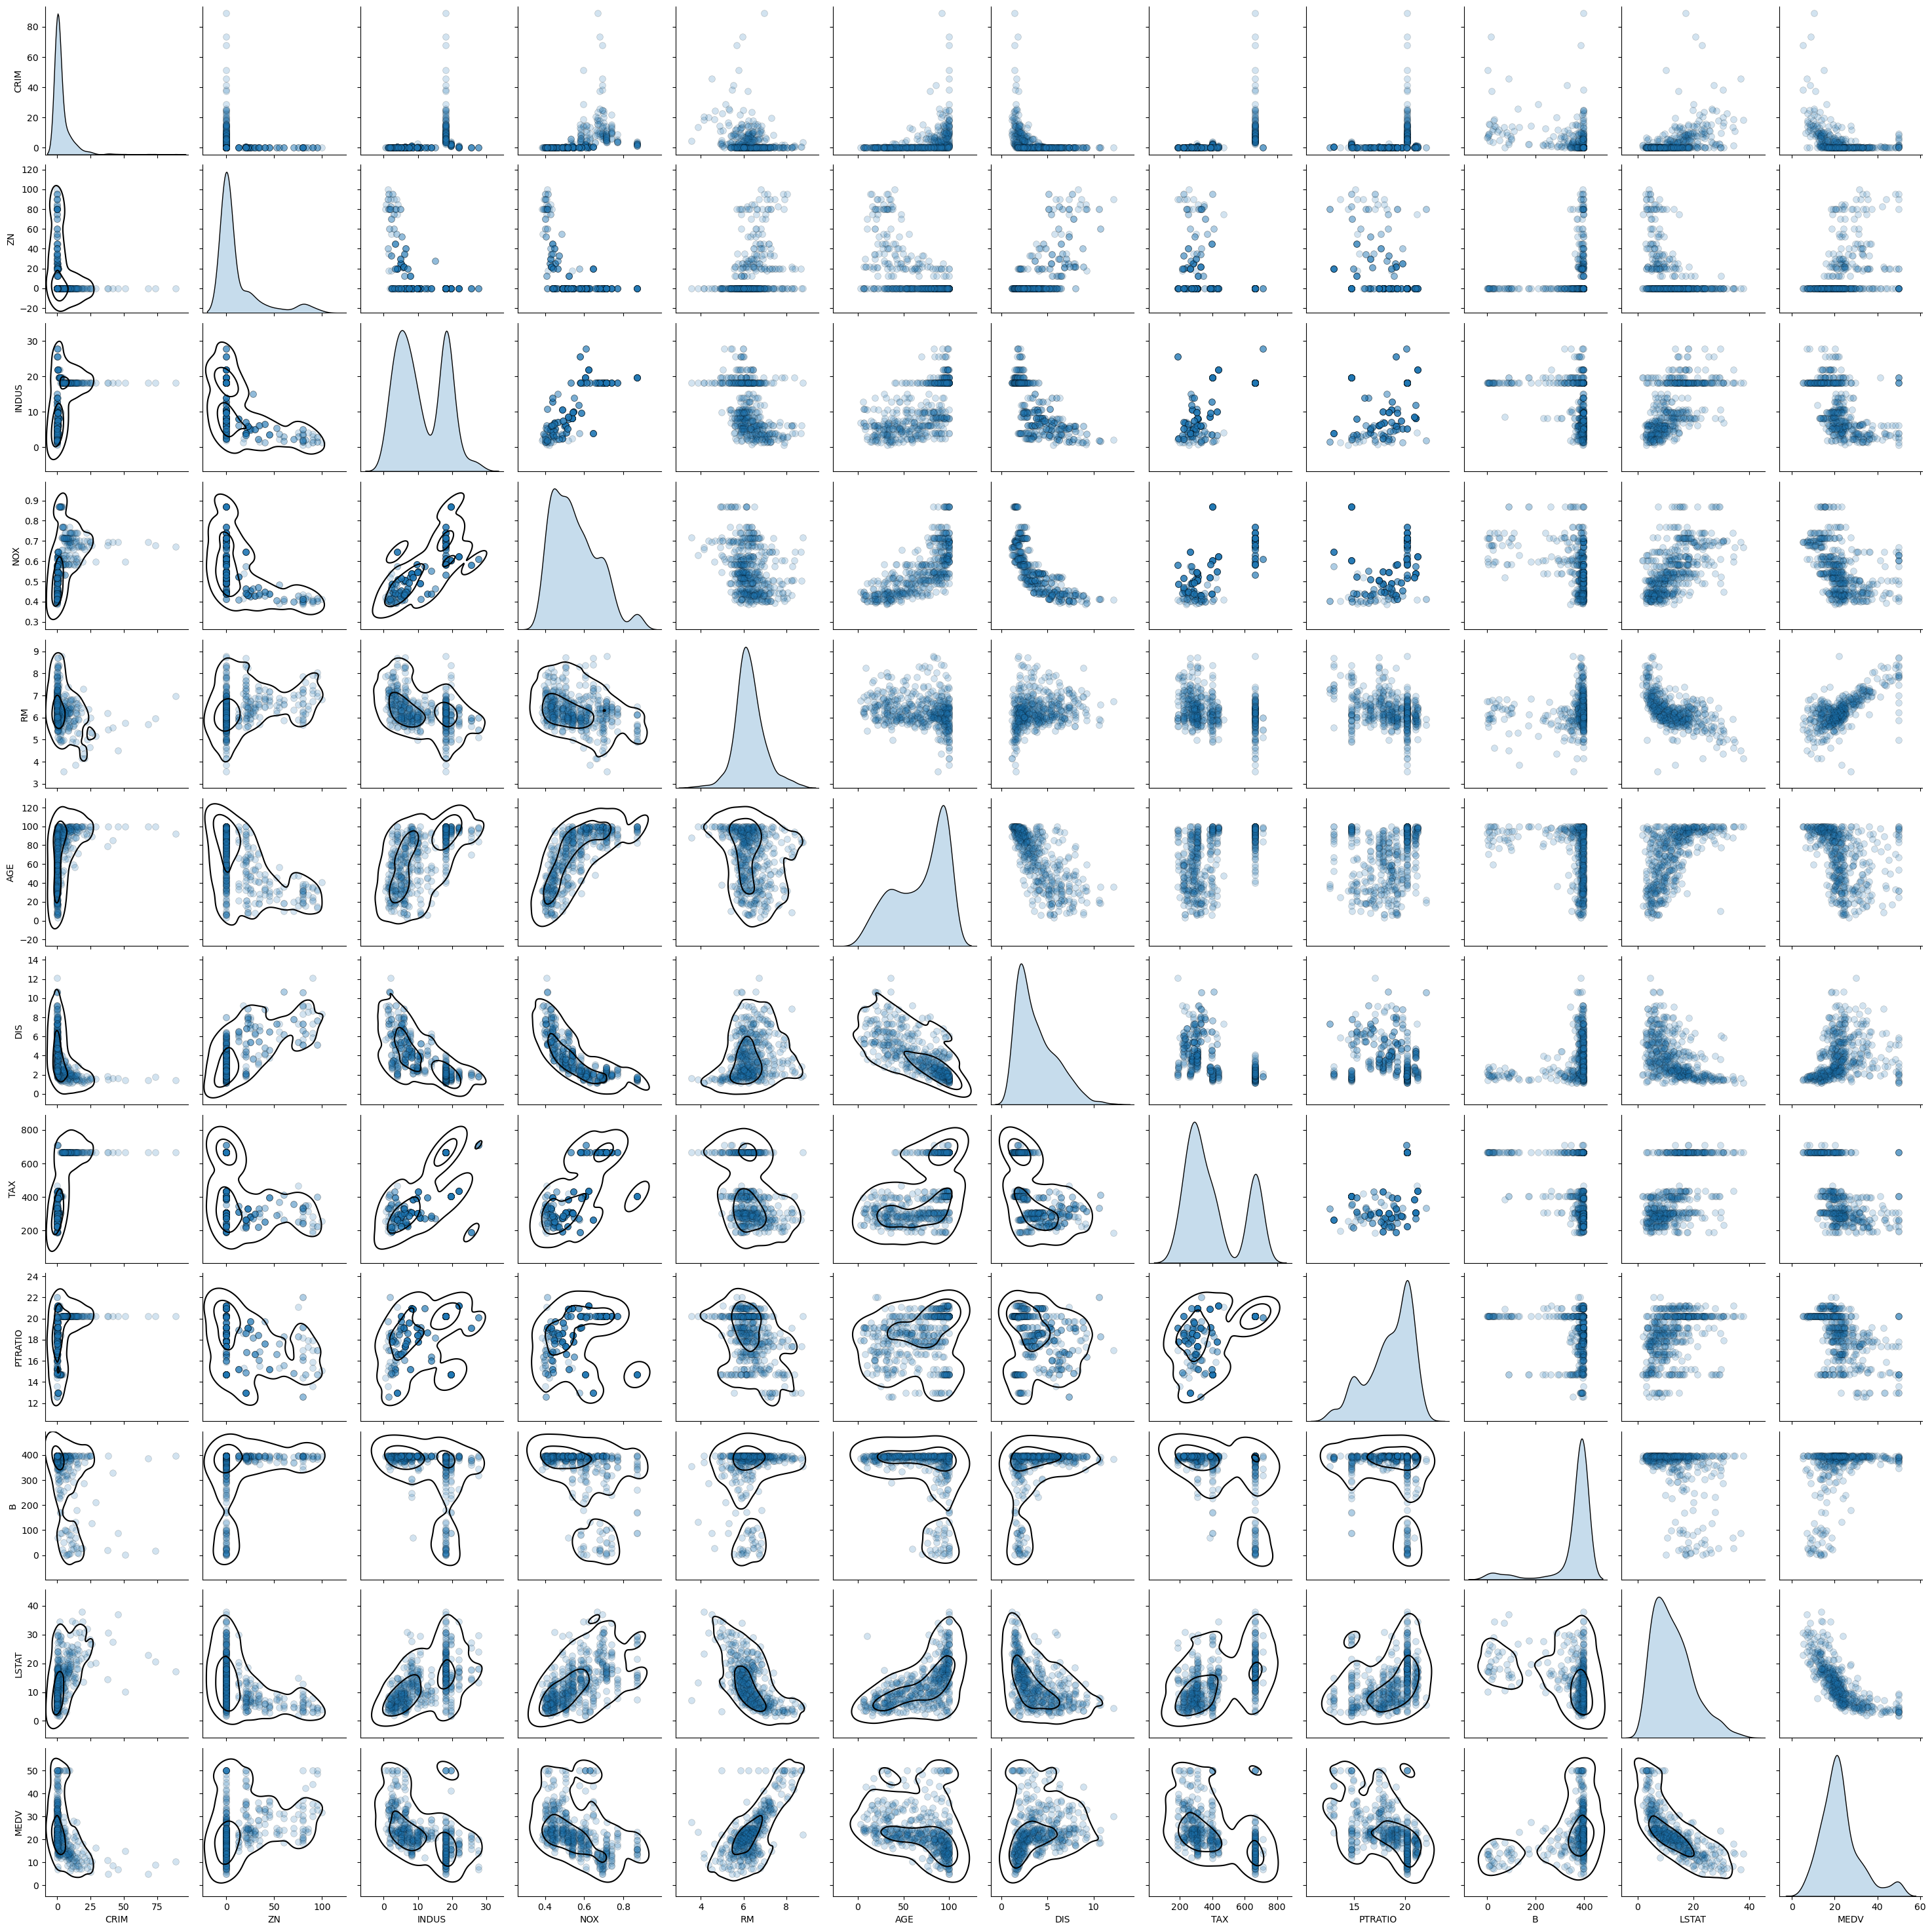

In [18]:
# pairplots on cont_data
plt.figure(figsize=(12, 12))

dpalette = sns.color_palette("winter",n_colors = 3)   # matrix scatter plot with points and density estimator
palette = sns.color_palette("winter")

matrixplot = sns.pairplot(cont_data, diag_kind = 'kde', palette = dpalette, diag_kws={'edgecolor':'black'},
                          plot_kws=dict(s=50, edgecolor="black", linewidth=0.5,alpha=0.2))
matrixplot.map_lower(sns.kdeplot, levels=3, color="black")

plt.show()

Los gráficos de pairplot se puede ver correlación entre algunas de las variables, sin embargo solo los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente con el atributo target (MEDV)

En la diagonal se puede ver la distribución de cada variable, vemos que algunas variables como ZM y CRIM tienen distribucción asimétrica a la la derecha y B tiene distribuciones asimétricas a la izquierada, esto puede deberse a la presencia de valores atípicos.

Algunas de las variables independientes parecen estar altamente correlacionadas entre sí, tal se tengan que realizar algun estudio adicional de multicolinealidad de las variables. Se trazará un mapa de calor para chequear la correlación entre las variables:

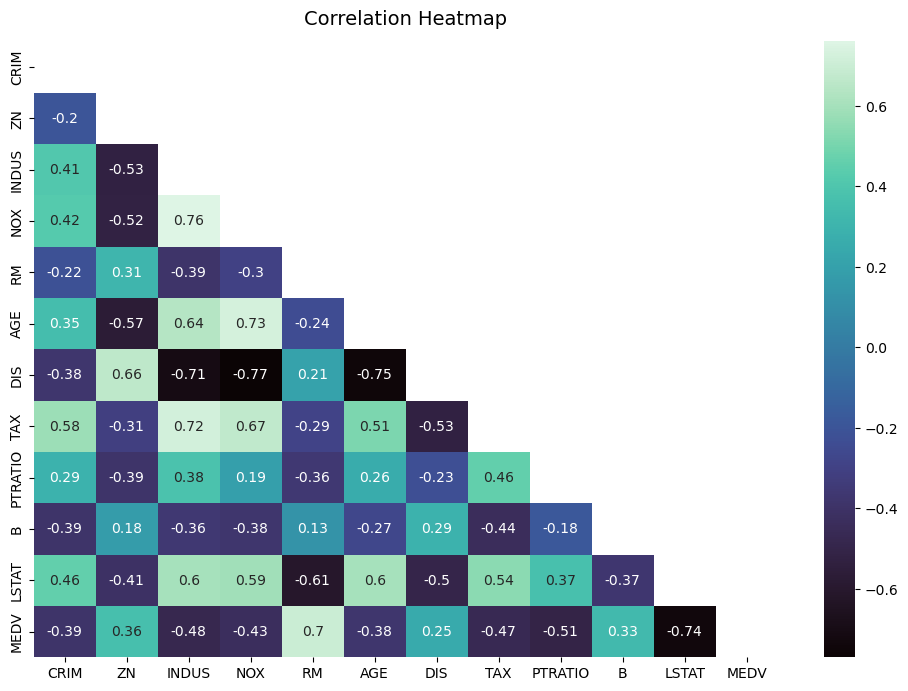

In [19]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))

housing_corr_num = housing_data.drop(['CHAS','RAD'], axis=1)

mask = np.triu(np.ones_like(housing_corr_num.corr().round(2))) 

ax= sns.heatmap(housing_corr_num.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que algunos atributos en el conjunto de datos están tan fuertemente correlacionados postivamente o negativamente, sin embargo solo los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente con el atributo target (MEDV). Se infiere que la mayoria de las variables no distribuyen normalmente.
</div>

### Análisis de los atributos categóricos.

Ahora se analizará las variables categóricas, en esta sección se incluye los atributos "CHAS" y "RAD".

In [20]:
cols = ['CHAS', 'RAD']

for i in cols: 
    housing_data[i] = housing_data[i].astype('category')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [21]:
cat = housing_data.select_dtypes('category')
cat

CHAS RAD
0      0   1
1      0   2
2      0   2
3      0   3
4      0   3
..   ...  ..
501    0   1
502    0   1
503    0   1
504    0   1
505    0   1

[506 rows x 2 columns]

<h3>Observaciones:</h3>

   * En este resúmen se puede identificar rápidamente los valores más frecuentes de cada característica y el número de veces que aparecen. 
   * El atributo "CHAS" tiene dos valores unico, siendo el de mayor frecuencia el numero 0. 
   * El atributo "RAD" tiene 9 valores y los que mas se repiten son los numero 4, 5 y 24.

* **Exploración gráfica de las variables categoricas**

In [22]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

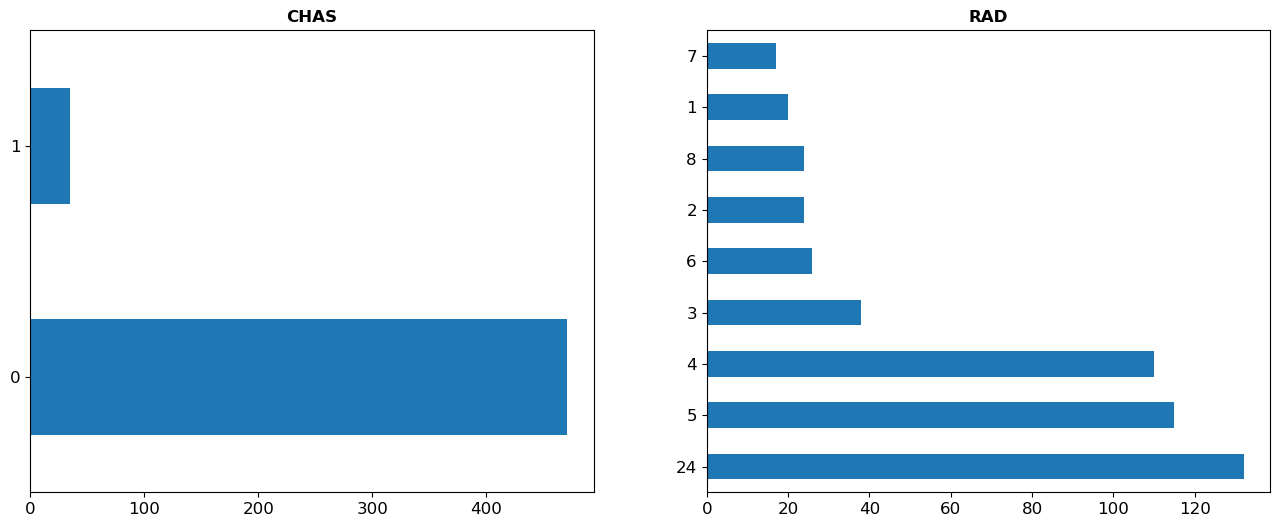

In [23]:
graficos_eda_categoricos(cat)

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que en el atributo "CHAS" la mayor frecuencia es que las casas no limitan con el rio, mientras que en el  atributo "RAD" los radios para el acceso a las autopista que más frecuentes se encuentran las casas son de 4,5 y 24.
</div>

### Aplicación de prueba de hipotesis para chequear distribución normal

Se comprobará si las variables siguen la misma distribución normal (forman una gausiana), a traves de un Test de Shapiro.

In [24]:
def check_normal_distribution(data):
    for i in data.columns:
        shapiro_test = stats.shapiro(data[i])
        print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
        if shapiro_test.pvalue>0.05:
            print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
        else:
            print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')


In [25]:
check_normal_distribution(housing_data)

La variable CRIM tiene un p-value=  1.3285678005931464e-36
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  7.882576753156324e-34
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.0642289039786765e-17
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  2.350467979135232e-40
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  5.775851259944009e-14
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable RM tiene un p-value=  2.41115960530891e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable AGE tiene un 

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que las muestras no tienes una distribución normal (Probablemente no Gaussiana).
</div>

### 1.6 Pre-procesamiento

*  Dado que las variables numéricas independientes no tienen distribucción normal o gausiona se le aplicaran normalización:
    * Outliers:**'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'**, **'RAD'** se le aplicará **RobustScaler**.
    * No outliers: **'INDUS', 'NOX', 'TAX', 'AGE'** se le aplicará **MinMaxScaler**.
* La variable "CHAS" al ser un dummie, está lista para un entrenamiento de Machine learning por lo que no se realizará ninguna transformación.

* **Transformación al dataset**

In [198]:
hdata_transf = housing_data.copy()

* **Transformación de las variables independientes**

In [199]:
#MinMaxScaler for variables without outliers
minmax_col = ['INDUS', 'NOX', 'TAX', 'AGE']
trans = MinMaxScaler()
hdata_transf[minmax_col] = trans.fit_transform(data_transf[minmax_col])
hdata_transf.head()

CRIM    ZN     INDUS CHAS       NOX     RM       AGE     DIS RAD  \
0  0.00632  18.0  0.067815    0  0.314815  6.575  0.641607  4.0900   1   
1  0.02731   0.0  0.242302    0  0.172840  6.421  0.782698  4.9671   2   
2  0.02729   0.0  0.242302    0  0.172840  7.185  0.599382  4.9671   2   
3  0.03237   0.0  0.063050    0  0.150206  6.998  0.441813  6.0622   3   
4  0.06905   0.0  0.063050    0  0.150206  7.147  0.528321  6.0622   3   

        TAX  PTRATIO       B  LSTAT  MEDV  
0  0.208015     15.3  396.90   4.98  24.0  
1  0.104962     17.8  396.90   9.14  21.6  
2  0.104962     17.8  392.83   4.03  34.7  
3  0.066794     18.7  394.63   2.94  33.4  
4  0.066794     18.7  396.90   5.33  36.2

In [202]:
#RobustScaler for variables with outliers
robust_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'RAD']
Robust_scaler = preprocessing.RobustScaler().fit(hdata_transf[robust_col])
hdata_transf[robust_col] = Robust_scaler.transform(hdata_transf[robust_col])


hdata_transf.head()

CRIM    ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815    0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302    0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302    0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050    0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050    0  0.150206  1.271680  0.528321  0.924391   

    RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -0.20  0.208015 -1.339286  0.261902 -0.637681  24.0  
1 -0.15  0.104962 -0.446429  0.261902 -0.221889  21.6  
2 -0.15  0.104962 -0.446429  0.066675 -0.732634  34.7  
3 -0.10  0.066794 -0.125000  0.153016 -0.841579  33.4  
4 -0.10  0.066794 -0.125000  0.261902 -0.602699  36.2

* Chequear los tipos de variables, para verificar que esten en un mismo tipo de variables.

In [204]:
hdata_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


Se transformara la variables CHAS a numerica.

In [267]:
hdata_transf['CHAS'] = pd.to_numeric(hdata_transf['CHAS'], errors='coerce')

* **Visualización despues del preprocesado**

Se realiza un grafico de histograma y de cajas, para ver las mejores en los atributos, una vez aplicado trasformación.

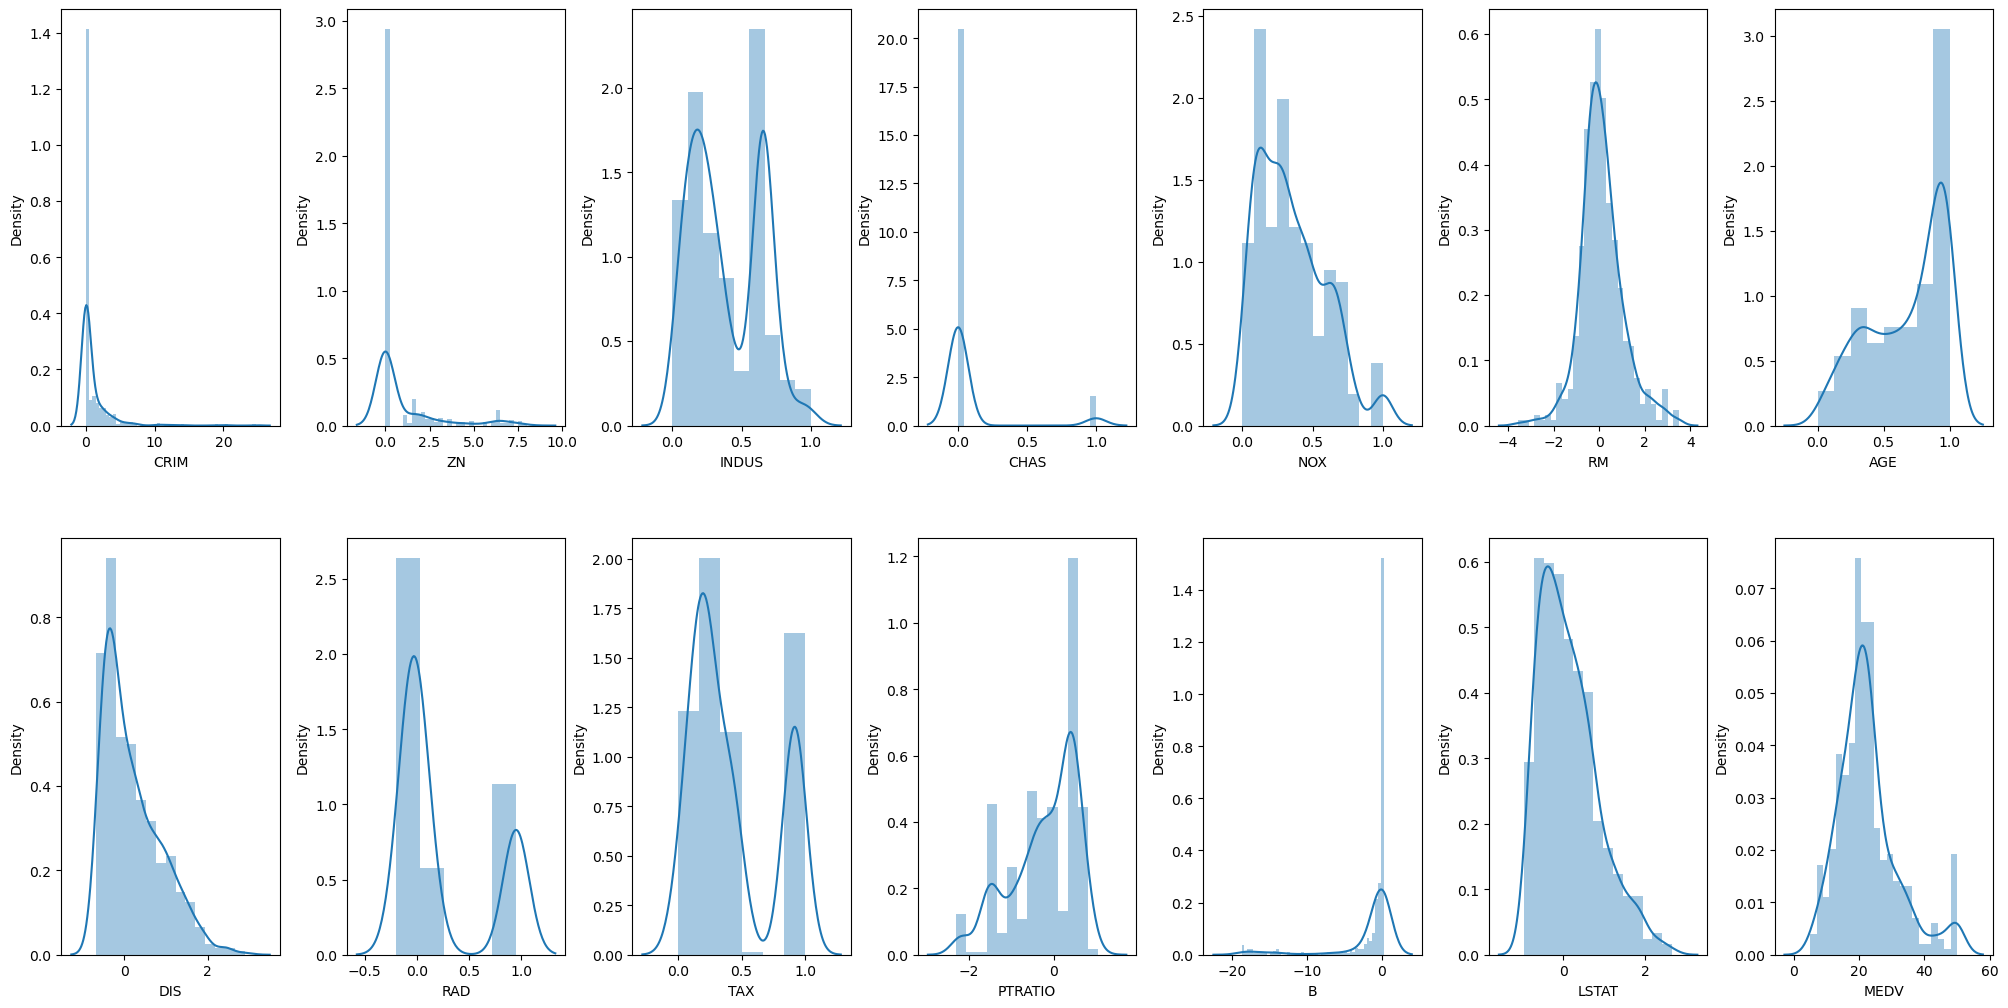

In [207]:
#histogram plots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in hdata_transf.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

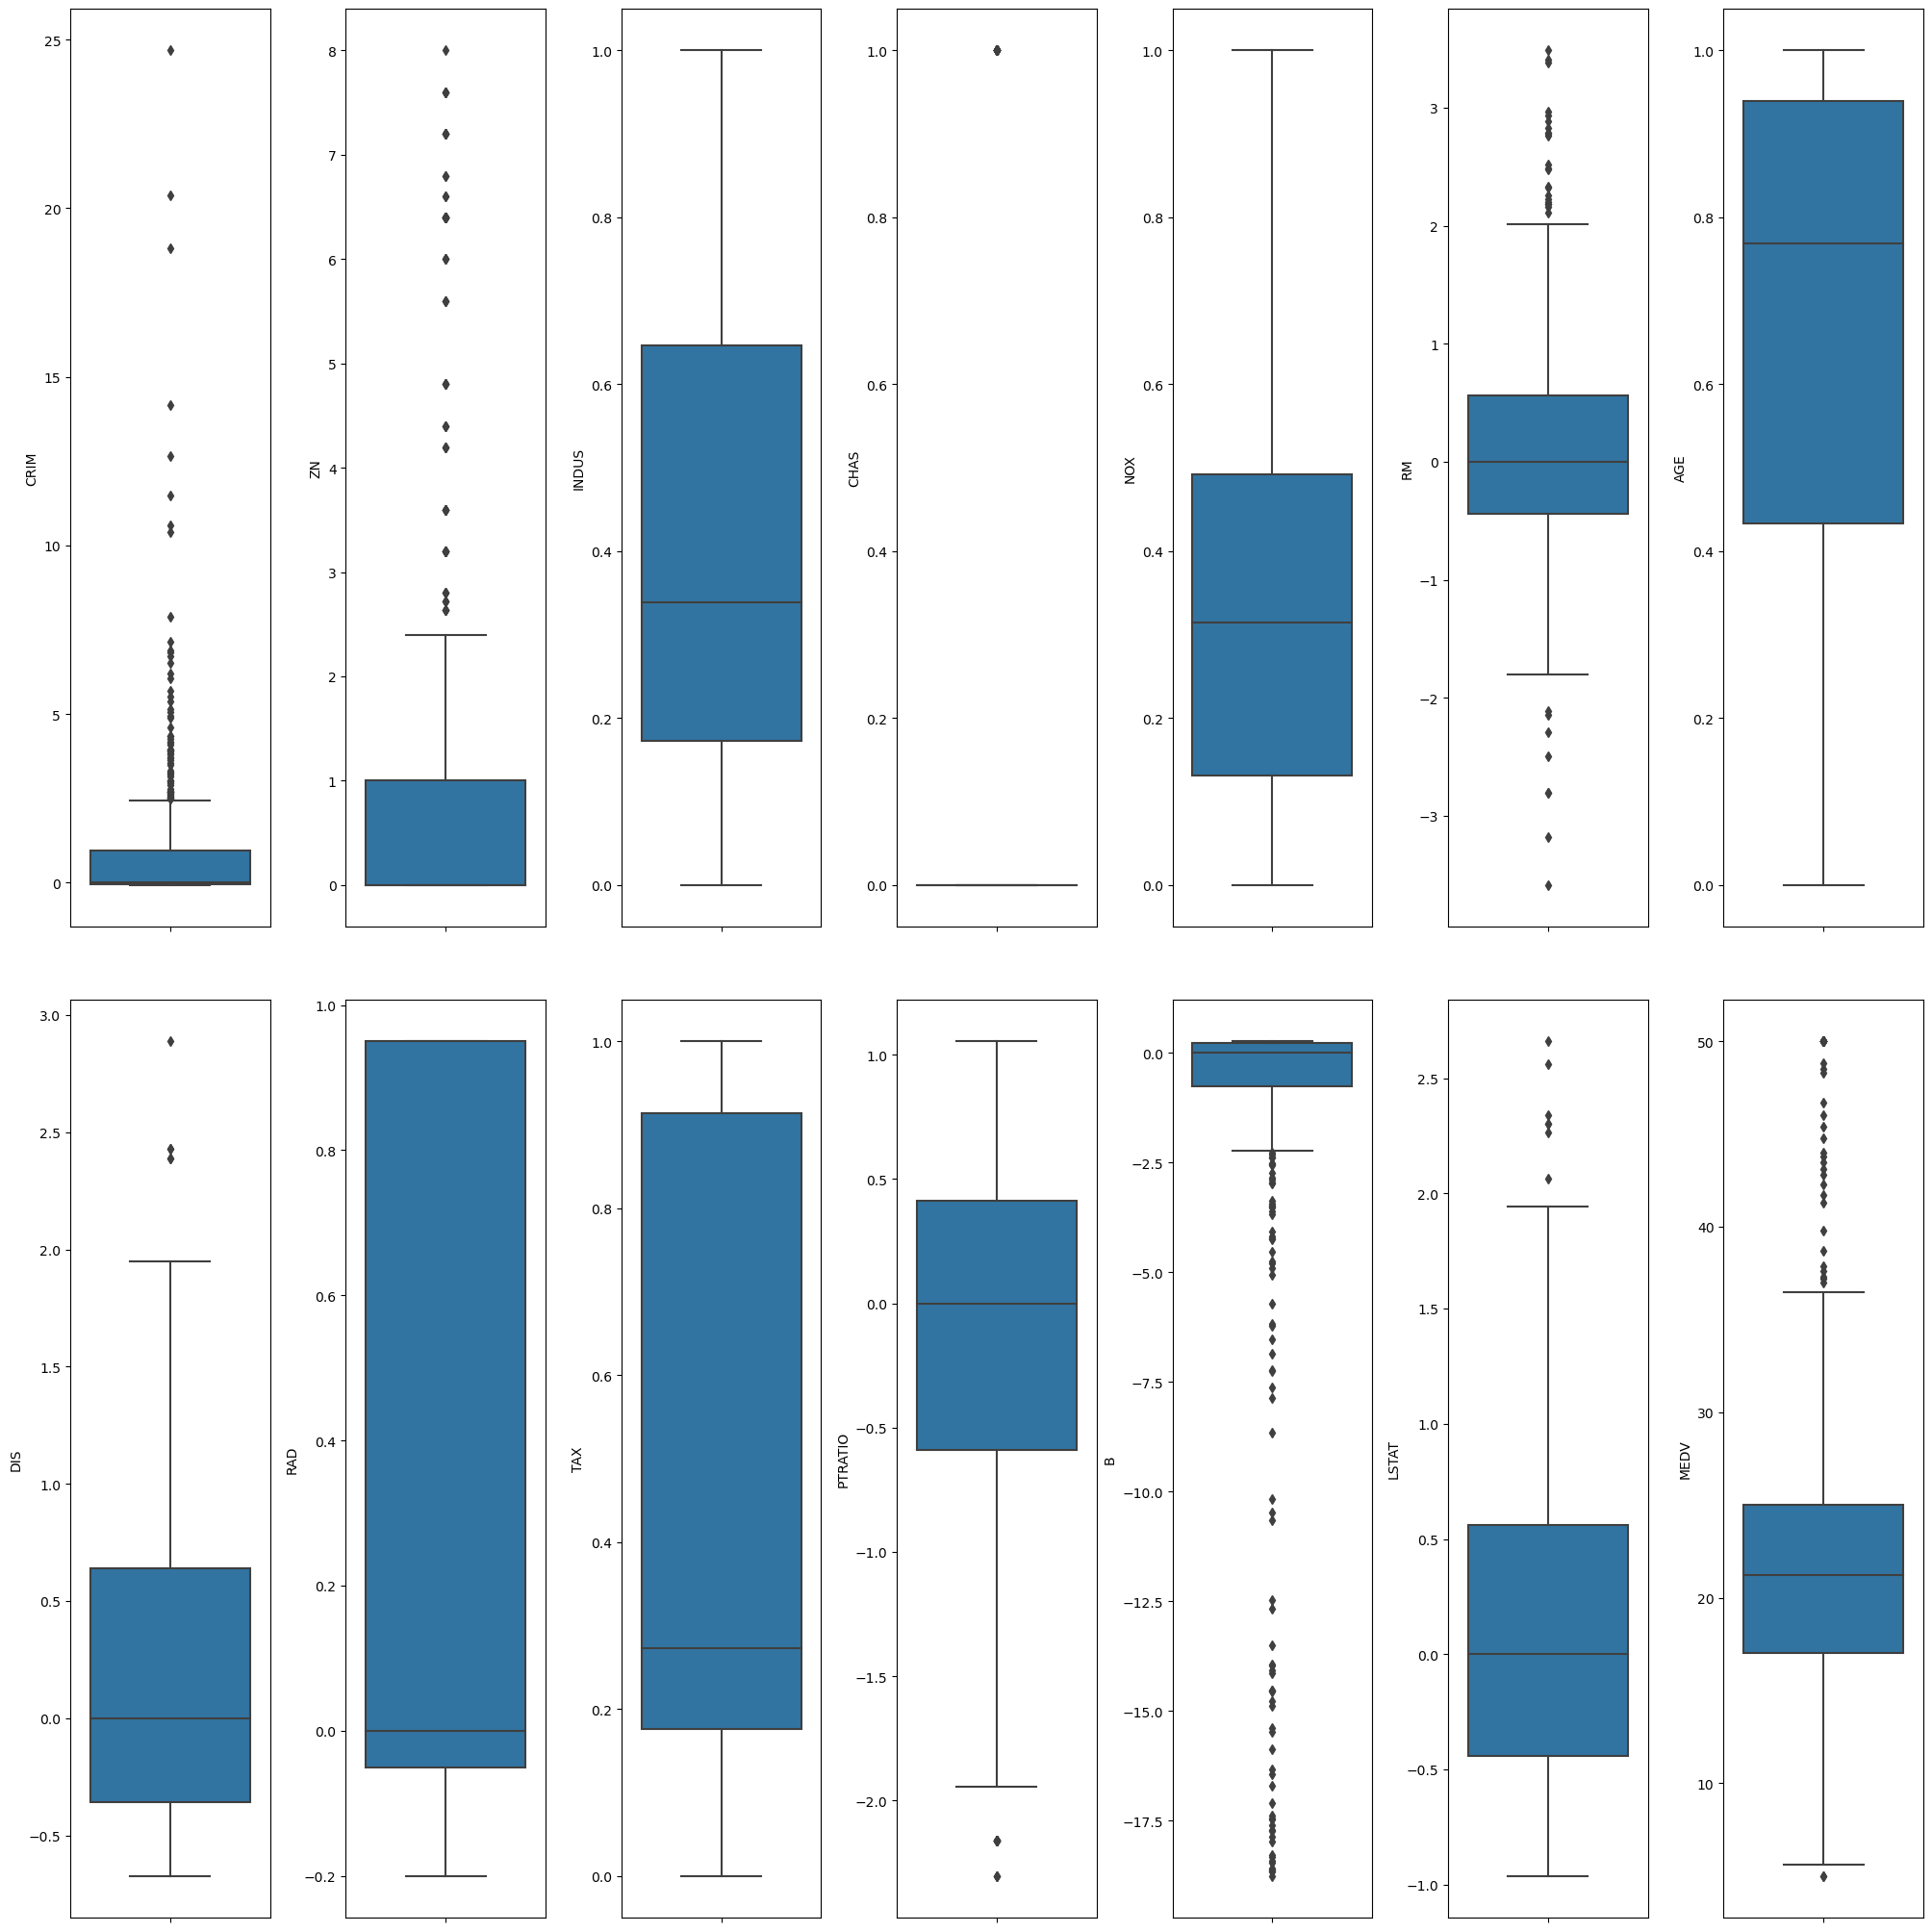

In [214]:
# boxplot x data
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in  hdata_transf.items():
    sns.boxplot(y=k, data= hdata_transf, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Aunque se aplicó transformación robuscale para mejorar los outliers, en las variables "CRIN", "ZN", "RM", "B", 'RAD' no hubo una mejora significativa, mantiene altos valores tomando en cuenta que son datos escalados, por lo que es probable que pueda afectar los modelos de regresión. Posiblemente requiera otro tipo de trasformación o aplicar imputación por outliers.

### 1.7 Definir target y features

In [271]:
x = hdata_transf.drop(columns = 'MEDV')
y = hdata_transf['MEDV']

In [272]:
x.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   

    RAD       TAX   PTRATIO         B     LSTAT  
0 -0.20  0.208015 -1.339286  0.261902 -0.637681  
1 -0.15  0.104962 -0.446429  0.261902 -0.221889  
2 -0.15  0.104962 -0.446429  0.066675 -0.732634  
3 -0.10  0.066794 -0.125000  0.153016 -0.841579  
4 -0.10  0.066794 -0.125000  0.261902 -0.602699

In [273]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [274]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 1.8 Split del dataset: Train y Test data

Para realizar la división del Dataset: Training y Test (Train Test Split), se utilizará 80% para el Train y 20% para el Test.

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
#random_state=4
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4, train_size=0.80)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


<div class="alert alert-block alert-info">
<b>Ejercicio 1:</b> Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.
</div>

In [218]:
# import modules for Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import svm

# import modules for the metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

**Modelo N°1: REGRESIÓN LINEAL MÚLTIPLE**

* **Entrenar el modelo**

In [277]:
#Instanciar
rm = LinearRegression()

#Entrenar
rm.fit(x_train,y_train)

LinearRegression()

* **Predecir el modelo**

In [278]:
# Model prediction on train data
y_pred_rm_train = rm.predict(x_train)

In [279]:
# Model prediction on test data
y_pred_rm = rm.predict(x_test)

In [280]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_rm[:10]

array([12.07495986, 26.9894969 , 17.58803353, 18.15584511, 36.92091659,
       25.43267386, 31.09256932, 19.72549907, 19.66103377, 22.96358632])

In [281]:
prediccion = pd.DataFrame(y_pred_rm, columns = ['PREDICCION'])
prediccion.head()

PREDICCION
0   12.074960
1   26.989497
2   17.588034
3   18.155845
4   36.920917

* **Revisión de los parámetros de entrenamiento**

In [282]:
rm.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [236]:
rm.intercept_

28.186171970064706

* **Evaluar el modelo**

Para evaluar cada modelo se calculará:
* El R2 que es una medida de la relación lineal entre X e Y, se interpreta como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente. 
* El MSE es una medida que indica qué tan cerca está la regresión de los puntos observados. Cuanto menor sea el MSE, mejor será el pronóstico.

In [284]:
def evals_test(data, predicted): 
    
    r2_square = metrics.r2_score(data, predicted)
    mse = metrics.mean_squared_error(data, predicted)
    errors = mean_absolute_error(data, predicted)
    
    print('R2 : ', r2_square)
    print('MSE (Error cuadrático medio) : ', mse)
    print('MAE (Error Absoluto Medio) : ',  errors)

In [285]:
# Model Evaluation on train data
evals_test(y_train, y_pred_rm_train)

R2 :  0.7415244219726307
MSE (Error cuadrático medio) :  21.197139922226427
MAE (Error Absoluto Medio) :  3.2269621335646836


In [286]:
# Model Evaluation on test data
evals_test(y_test, y_pred_rm)

R2 :  0.726345145970251
MSE (Error cuadrático medio) :  25.419587126821842
MAE (Error Absoluto Medio) :  3.3677909837965756


El puntaje del modelo r2 es menor en los datos de prueba, por lo que existe la posibilidad de sobreajuste, se verificará esto usando la regularización. Sin embargo la diferencia del MAE entre el train y test de 0.14, siendo un poco mas alto el del Test.

* **Visualización de la predicción**

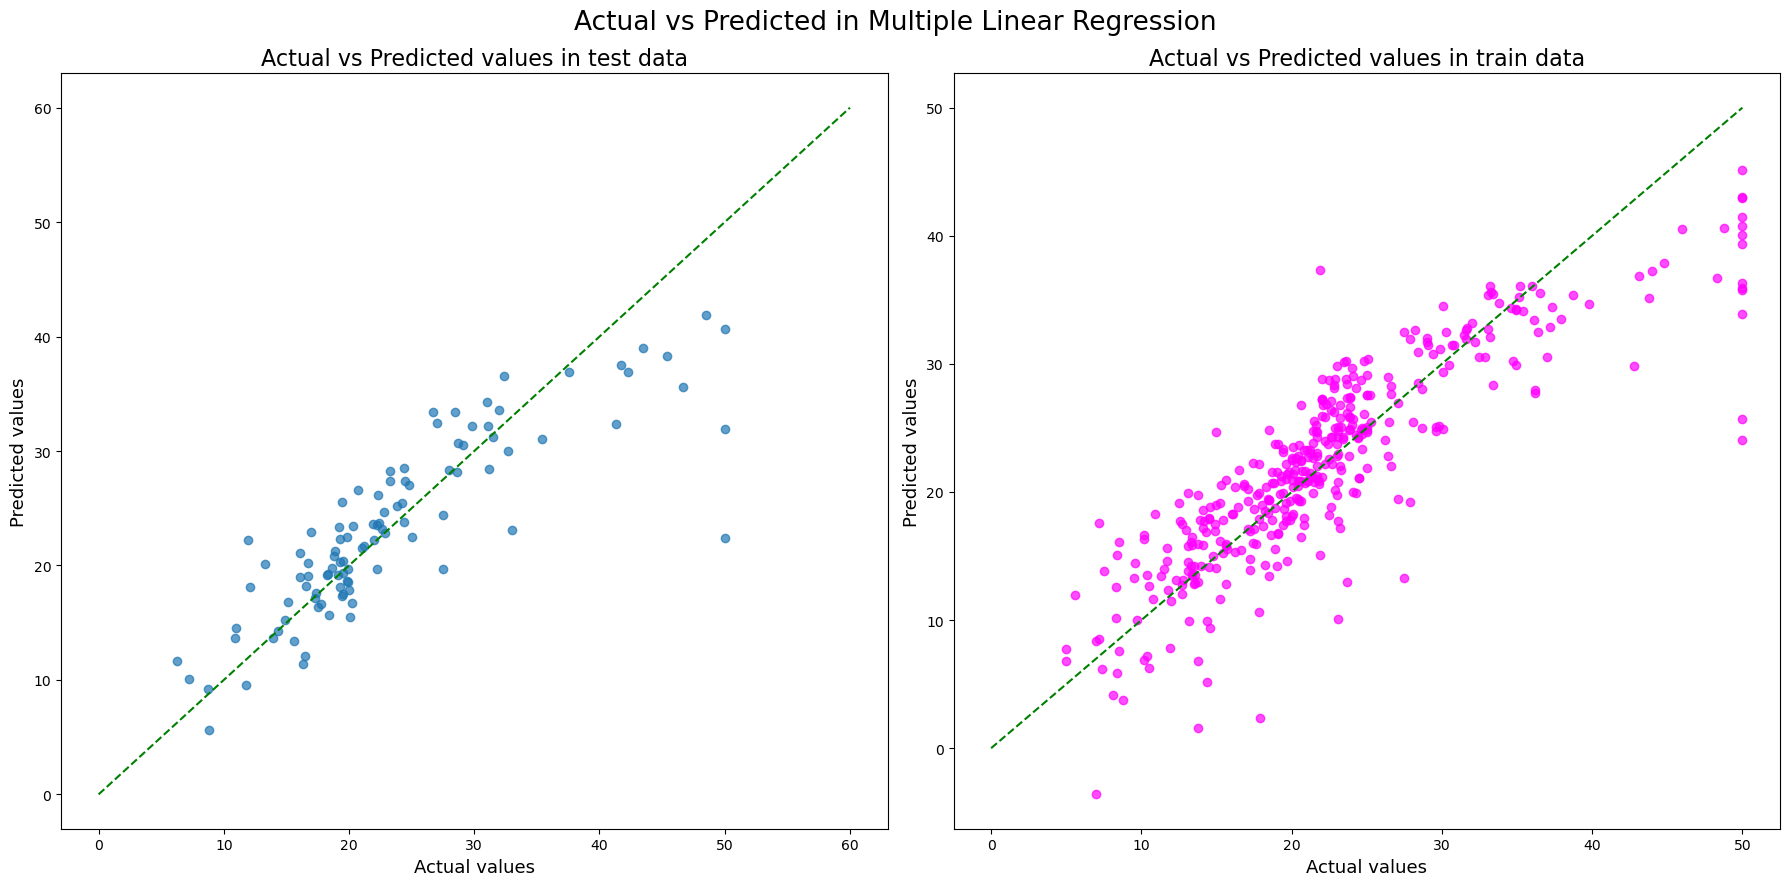

In [287]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_rm , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_train, y = y_pred_rm_train, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)
plt.tight_layout(); 

En los graficos de dispersión se observan valores atipicos o outliers, una mayor dispersion en los valores del test, lo cual puede estar afectando a los resultados en R2. Al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión,  lo cual se puede observar los valores muy dispersos y algunos puntos alejados de la linea recta.

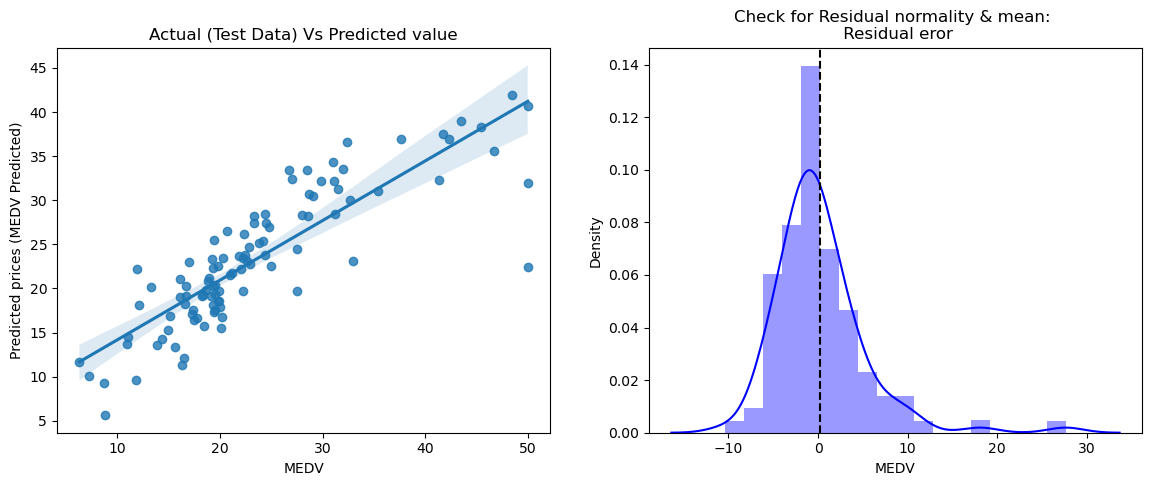

In [288]:
# Plotting Actual observations vs predicted observations Test Data
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_rm, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_rm)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

* En el diagrama de dispersión se puede observar que la línea diagonal no es tan recta, lo que representa las diferencias en las predicciones reales y las predictivas. 
* Los errores se centran alrededor de 0 pero están un poco sesgados a la izquierda.

**Modelo N°2: Ridge Regression**

En vista que en la regresion lineal multimple el r2 del test es menor que el train, se aplicará una regularización de Ridge porque quizas los valores de R2 diferentes, se puede inferir un overfitting o una multicolinealidad de las variables independientes entre si, previo a esto se aplicará VIF para chequear la suposición. 

* **Chequear la multicolinealidad de las variables independientes**.

Se realizará un estudio de la multicolinealidad de las variables independientes, se utilizará el modelo Un factor de inflación de varianza (VIF), la cual es una medida de la cantidad de multicolinealidad en el análisis de regresión. VIF se utiliza para identificar la correlación de una variable independiente con un grupo de otras variables.

In [289]:
VF_eval=housing_data.copy()

In [290]:
# import module to evaluate multicollinearity from the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we ´ll define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

In [291]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [292]:
calculate_vif(VF_eval, cols)

VIF features
0    2.100373     CRIM
1    2.844013       ZN
2   14.485758    INDUS
3    1.152952     CHAS
4   73.894947      NOX
5   77.948283       RM
6   21.386850      AGE
7   14.699652      DIS
8   15.167725      RAD
9   61.227274      TAX
10  85.029547  PTRATIO
11  20.104943        B
12  11.102025    LSTAT

Como se observa se tienen algunos valores VIF muy grandes, mayores a 10, confirmando la multicolinealidad entre las varaibles dependientes. En este sentido se aplicará el modelo Ridge debido que trabaja con este tipo de casos.

* **Entrenar el modelo**

In [293]:
#Instanciar
ridge = Ridge()

#Entrenar
ridge.fit(x_train,y_train)

Ridge()

* **Predecir el modelo**

In [294]:
# Model prediction on train data
y_pred_rid_train = ridge.predict(x_train)

In [295]:
# Model prediction on test data
y_pred_rid = ridge.predict(x_test)

In [296]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_rid[:10]

array([12.02719461, 26.76989373, 17.6646513 , 17.74737039, 36.78487147,
       25.31329149, 30.93831592, 19.50170016, 19.42579003, 23.42754888])

In [297]:
prediccion = pd.DataFrame(y_pred_rid, columns = ['PREDICCION'])
prediccion.head()

PREDICCION
0   12.027195
1   26.769894
2   17.664651
3   17.747370
4   36.784871

* **Revisión de los parámetros de entrenamiento**

In [247]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

* **Evaluar el modelo**

Para evaluar cada modelo se calculará:
* El R2 que es una medida de la relación lineal entre X e Y, se interpreta como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente. 
* El MSE es una medida que indica qué tan cerca está la regresión de los puntos observados. Cuanto menor sea el MSE, mejor será el pronóstico.

In [298]:
# Model Evaluation on train data
evals_test(y_train,y_pred_rid_train)

R2 :  0.7408064931733449
MSE (Error cuadrático medio) :  21.25601603473499
MAE (Error Absoluto Medio) :  3.216402414650908


In [299]:
# Model Evaluation on test data
evals_test(y_test, y_pred_rid)

R2 :  0.725816938487666
MSE (Error cuadrático medio) :  25.468651910168056
MAE (Error Absoluto Medio) :  3.332872308236703


Se obtuvo el mismo puntaje r2 que en el modelo de regresion lineal multiple, probablemente no exista overfitting, existan alguna cantidad excesiva de Dimensiones (features), con muchas variantes distintas, sin suficientes muestras o los altos valores de outliers que aun presentan este afectando los resultados. Sin embargo se continuará evaluando otros modelos para verificar si exisa alguna mejora. 

* **Visualización de la predicción**

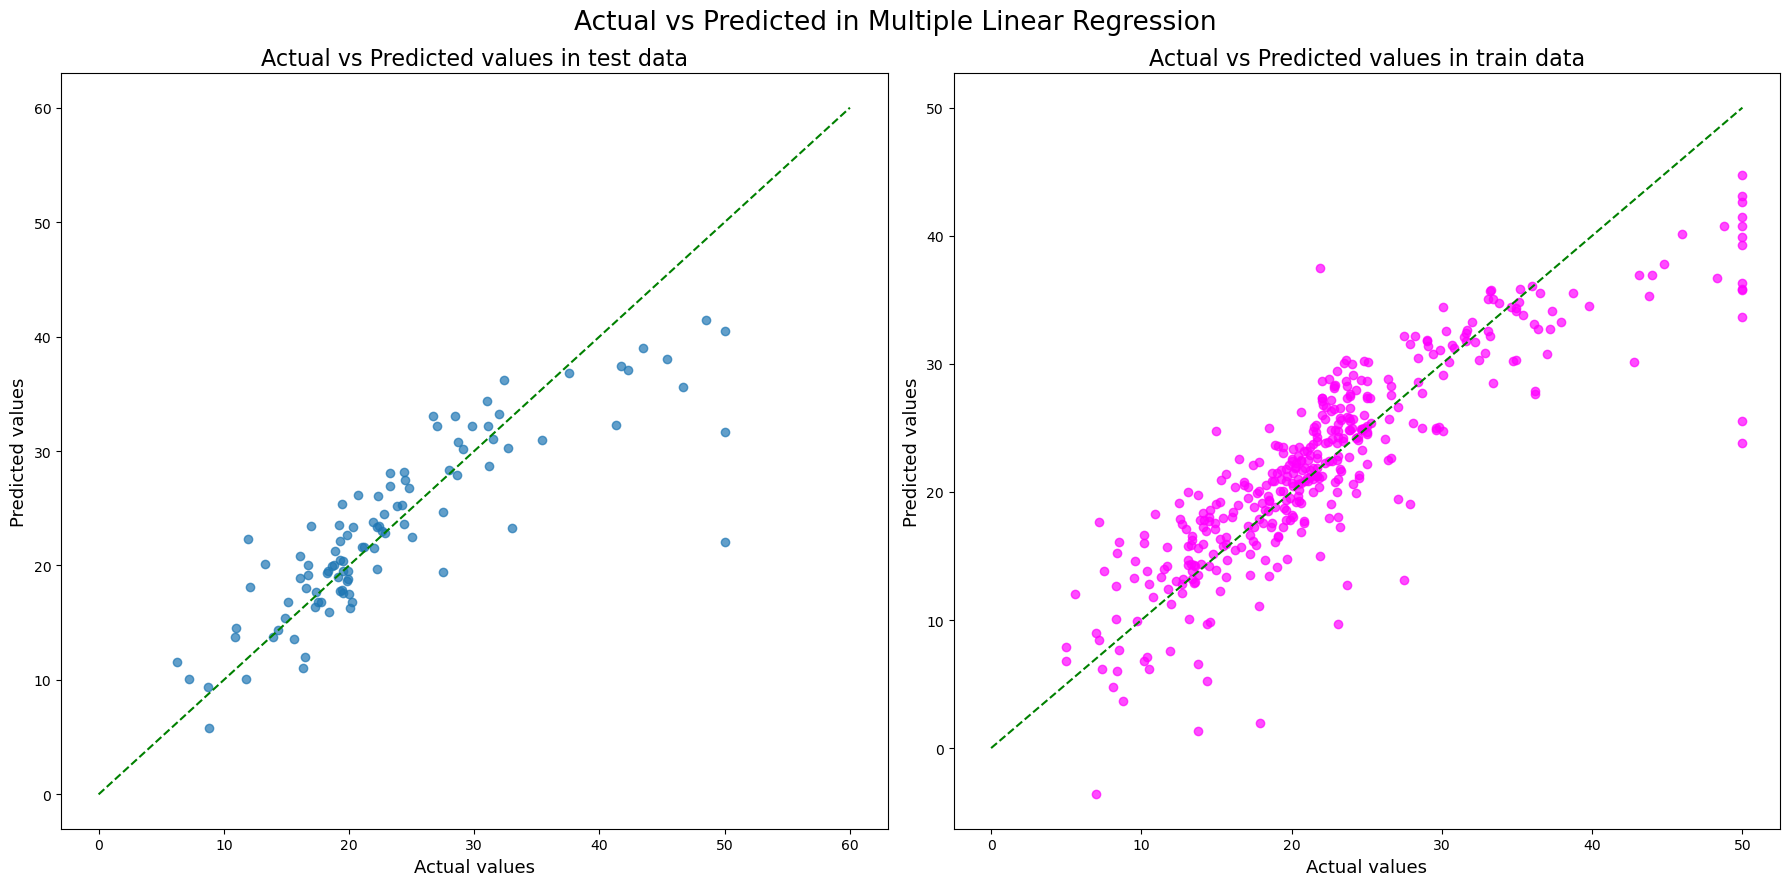

In [300]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_rid , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_train, y = y_pred_rid_train, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)
plt.tight_layout(); 

Al igual que el modelo de regresión lineal multiple,los graficos de dispersión se observan valores atipicos o outliers, una mayor dispersion en los valores del test, lo cual puede estar afectando a los resultados en R2. 

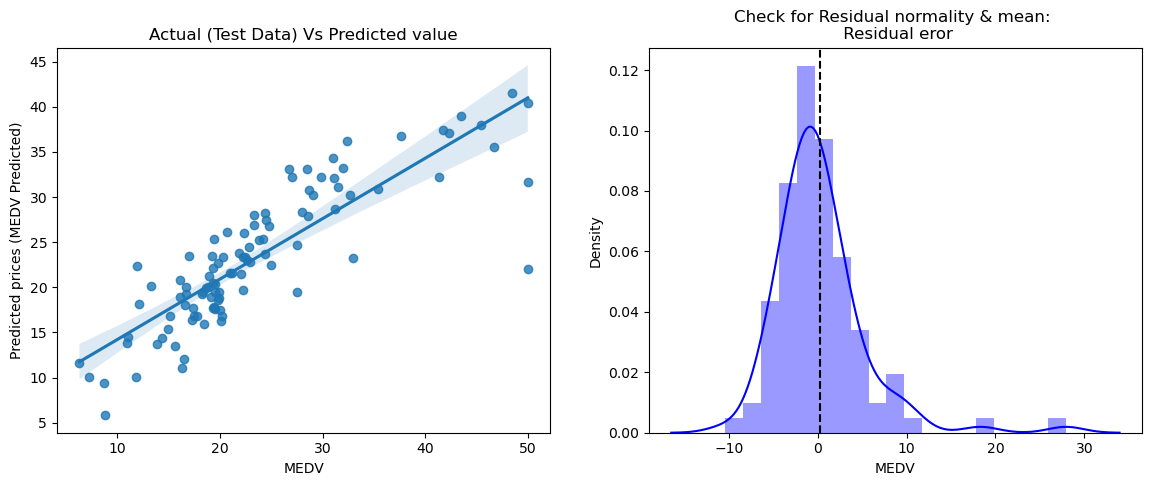

In [301]:
# Plotting Actual observations vs predicted observations Test Data
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_rid, x=y_VIF_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_VIF_test - y_pred_rid)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

* En el diagrama de dispersión se puede observar que la línea diagonal no es tan recta, lo que representa las diferencias en las predicciones reales y las predictivas. 
* Los errores se centran alrededor de 0 pero están un poco sesgados a la izquierda.

**Modelo N°3: RANDOM FOREST REGRESIÓN**

* **Entrenar el modelo**

In [419]:
#Instanciar
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

* **Predecir el modelo**

In [420]:
# Model prediction on train data
y_pred_rFr_train = rfr.predict(x_train)

In [421]:
# Model prediction on train data
y_pred_rFr = rfr.predict(x_test)

In [422]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_rFr[:10]

array([18.325, 24.69 , 20.002, 19.252, 46.974, 23.981, 34.365, 18.104,
       15.891, 15.907])

In [423]:
prediccion_rfr = pd.DataFrame(y_pred_rFr, columns = ['PREDICCION'])
prediccion_rfr .head()

PREDICCION
0      18.325
1      24.690
2      20.002
3      19.252
4      46.974

* **Revisión de los parámetros de entrenamiento**

In [424]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

* **Evaluar el modelo con respecto al test data**

In [425]:
# Model Evaluation on train data
evals_test(y_train, y_pred_rid_train)

R2 :  0.7408064931733449
MSE (Error cuadrático medio) :  21.25601603473499
MAE (Error Absoluto Medio) :  3.216402414650908


In [426]:
# Model Evaluation on test data
evals_test(y_test, y_pred_rFr)

R2 :  0.8187548362399023
MSE (Error cuadrático medio) :  16.835722676470596
MAE (Error Absoluto Medio) :  2.373107843137255


El modelo de Randon forest si se obtuvieron mejores resultados, el R2 dl test es mayor que el train, asi como los valores del MSE y MAE mas cercanos al cero. Probablemte existe algo de overfiting o los ouliers en algunas variables pueden estar afectando.
Una funcion del Rando Forest es que se puede calcular la importancia de las variables en el modelo, quizas realizando la prediccion con las variables que mejor le dan puerza al nodo.

* **Visualización de la predicción**

Text(0.5, 1.0, 'Actual vs Predicted values in train data')

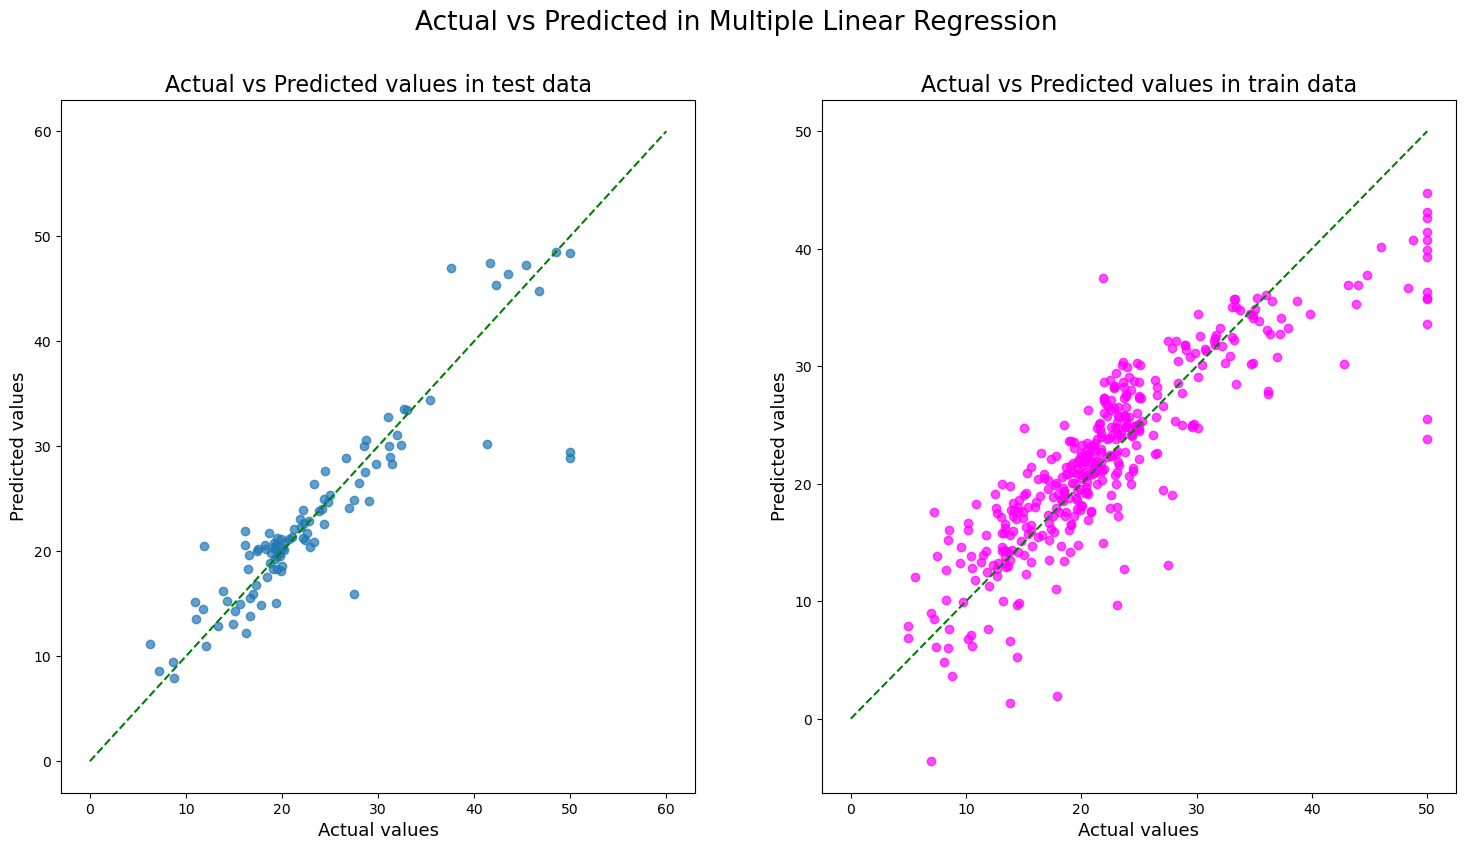

In [427]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_rFr , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_train, y = y_pred_rid_train, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)

Adiferencia de los modelos anteriores, al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión, lo cual se puede observar los valoresmas cercanos  a la linea recta en la data del test, infiriendo una mejora en el modelo. Adcionalmente los graficos de dispersión se observan valores atipicos o outliers, una mayor dispersion en los valores del train.

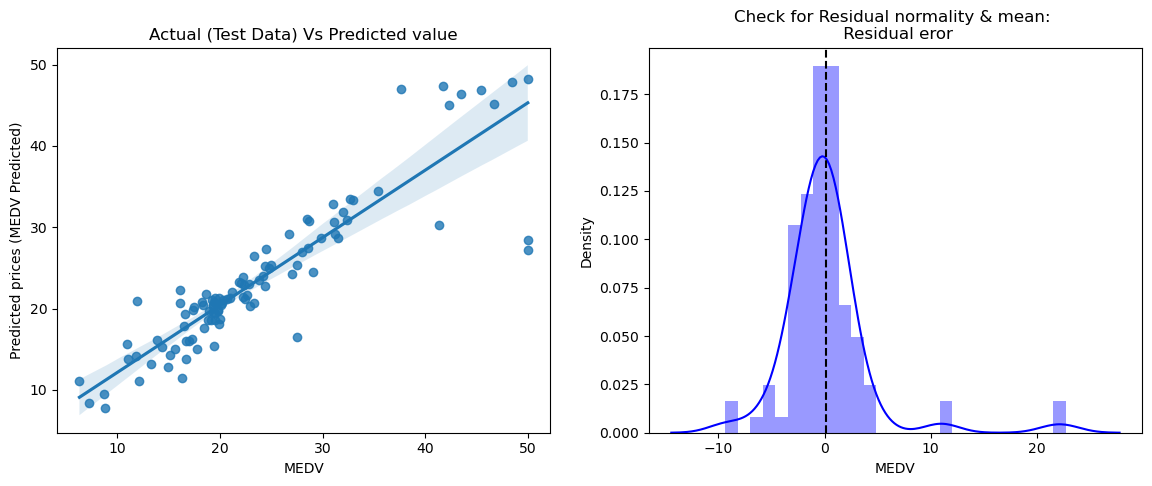

In [310]:
# Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_rFr, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_rFr)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Aunque se observa un error medio de 2.57, en la grafica se  ve claramente que esta vez los errores están más concentrados alrededor de cero que en las regresión anterior.

* **Análisis de la importancia de las variables**

RF calcula la importancia de las variables con el criterio de "decremento medio de la impureza", qué básicamente le das más valor a las variables que consiguen aumentar la pureza de los nodos. A menudo se usan para la selección de características en un flujo de trabajo de ciencia de datos. 

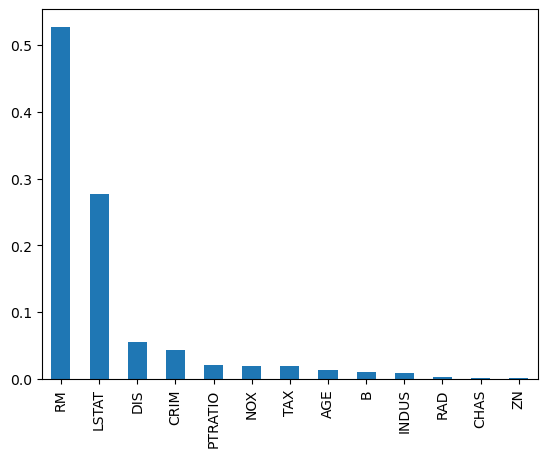

In [428]:
rfc_importances = pd.Series(rfr.feature_importances_, index=hdata_transf.drop(columns = "MEDV").columns).sort_values(ascending = False)
rfc_importances.plot(kind='bar')
plt.show()

* Podemos observar claramente que  RM, LSTAT y DIS son las características más importantes que se pueden usar para la predicción. Asi como las variables CRIM, B, INDUS, CHAS RAD y ZN no tienen gran importancia en la hora del modelajes, se pudiera evaluar el modelo sin tomar en cuenta algunas de estas variables, que coincen con tener altos valores de outliers como es el caso de las variables CRIM, B, RAD y ZN.

* **RANDOM FOREST REGRESIÓN aplicando la importancia** 

De acuerdo a los resultados de la importancia de las varaibles, se evaluará el modelo sin tomar en cuenta las variables: B, RAD y ZN.

In [354]:
 data_imp = hdata_transf.copy()

In [355]:
x_imp =  data_imp.drop(columns = ['B', 'RAD', 'ZN', 'MEDV', 'CRIM'])

In [356]:
y_imp = data_imp['MEDV']

* **Train y test**

In [387]:
x_imp_train, x_imp_test, y_imp_train, y_imp_test = train_test_split(x_imp, y_imp, random_state=4, train_size=0.80)
print(x_imp_train.shape, x_imp_test.shape, y_imp_train.shape, y_imp_test.shape)

(404, 9) (102, 9) (404,) (102,)


* **Entrenar el modelo**

In [459]:
#Instanciar
rfr_imp = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr_imp.fit(x_imp_train, y_imp_train)

RandomForestRegressor(random_state=42)

* **Predecir el modelo**

In [460]:
# Model prediction on train data
yimp_pred_rFr_train = rfr_imp.predict(x_imp_train)

In [461]:
# Model prediction on train data
yimp_pred_rFr = rfr_imp.predict(x_imp_test)

In [462]:
# los 10 primeros valores de MEDV (y_pred)
yimp_pred_rFr[:10]

array([19.517, 24.882, 19.61 , 20.182, 47.486, 23.997, 34.741, 17.982,
       17.305, 15.933])

In [463]:
imp_prediccion_rfr = pd.DataFrame(yimp_pred_rFr, columns = ['PREDICCION'])
imp_prediccion_rfr .head()

PREDICCION
0      19.517
1      24.882
2      19.610
3      20.182
4      47.486

* **Evaluar el modelo con respecto al test data**

In [464]:
# Model Evaluation on train data
evals_test(y_imp_train, yimp_pred_rFr_train)

R2 :  0.9807134961783311
MSE (Error cuadrático medio) :  1.5816531806930698
MAE (Error Absoluto Medio) :  0.8496856435643556


In [465]:
# Model Evaluation on test data
evals_test(y_imp_test, yimp_pred_rFr)

R2 :  0.8355386582280123
MSE (Error cuadrático medio) :  15.276686470588242
MAE (Error Absoluto Medio) :  2.315764705882353


El modelo de Randon forest tomando en cuenta los resultados de las importancia de las variables, se obtuvo una ligera mejora en los R2, sin embargo el train mayor al test y la diferencia entre el MAE test y train aumentaron , por lo querobablemte existe algo de overfiting o los ouliers de las variables RM y LAST pueden estar afectando.

* **Visualización de la predicción**

Text(0.5, 1.0, 'Actual vs Predicted values in train data')

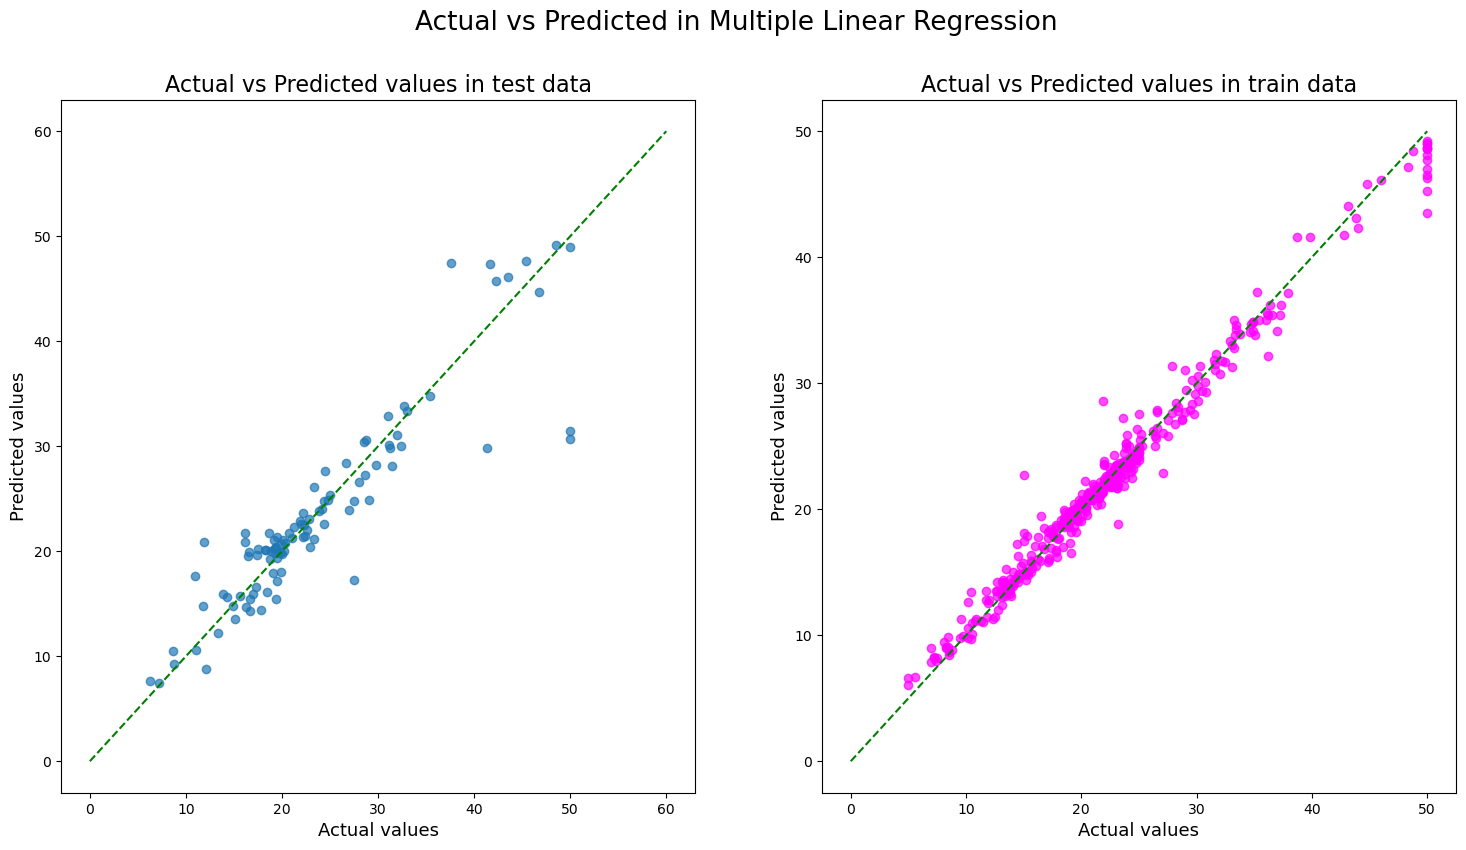

In [466]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_imp_test, y= yimp_pred_rFr , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_imp_train, y = yimp_pred_rFr_train, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)

Adiferencia de los modelos anteriores, al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión, lo cual se puede observar los valores mas cercanos  a la linea recta tanto los datas del test y train, infiriendo una mejora en el modelo. Adicionalmente los graficos de dispersión se observan algunos valores atipicos o outliers.

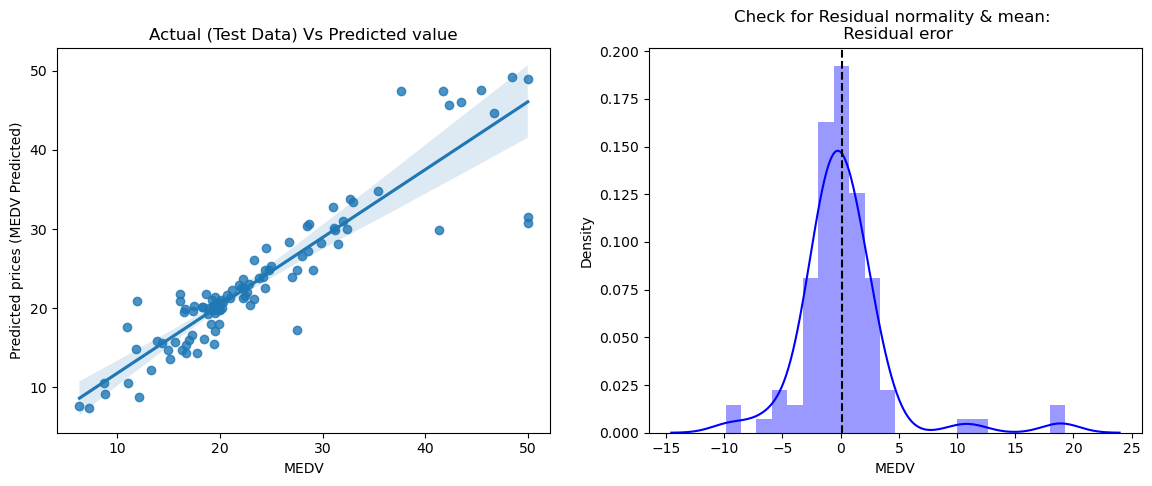

In [467]:
# Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=yimp_pred_rFr, x=y_imp_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_imp_test - yimp_pred_rFr)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Aunque se observa un error medio de 2.57, en la grafica se  ve claramente que esta vez los errores están más concentrados alrededor de cero que en las regresión anterior.

**Modelo N°4: XGBOOST REGRESIÓN**

* **Entrenar el modelo**

In [438]:
#Instanciar
xgbr = XGBRegressor (use_label_encoder=False) #lo del encoder es para que no de warning

#Entrenar
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

* **Predecir el modelo**

In [368]:
# Model prediction on train data
y_pred_xgbr_train = xgbr.predict(x_train)

In [369]:
# Model prediction on test  data
y_pred_xgbr = xgbr.predict(x_test)

In [370]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_xgbr[:10]

array([16.939705, 22.48864 , 19.438002, 17.503428, 48.611794, 24.344488,
       35.347   , 18.085268, 16.341955, 15.874559], dtype=float32)

In [371]:
prediccion_xgbr = pd.DataFrame(y_pred_xgbr, columns = ['PREDICCION'])
prediccion_xgbr.head()

PREDICCION
0   16.939705
1   22.488640
2   19.438002
3   17.503428
4   48.611794

* **Revisión de los parámetros de entrenamiento**

In [372]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

* **Evaluar el modelo con respecto al test data**

In [373]:
# Model Evaluation on train data
evals_test(y_train, y_pred_xgbr_train)

R2 :  0.9999911407789398
MSE (Error cuadrático medio) :  0.0007265295616993977
MAE (Error Absoluto Medio) :  0.01893801547513154


In [374]:
# Model Evaluation on test data
evals_test(y_test, y_pred_xgbr)

R2 :  0.8305215268053863
MSE (Error cuadrático medio) :  15.742723916831732
MAE (Error Absoluto Medio) :  2.4178270265167834


El modelo de XGBOOST tomando se obtuvo una ligera mejora en los R2, sin embargo el train mayor al test y la diferencia entre el MAE test y train aumentaron, por lo que probablemte existe overfiting o los ouliers de las variables RM y LAST pueden estar afectando.

* **Visualización de la predicción**

Text(0.5, 1.0, 'Actual vs Predicted values in train data')

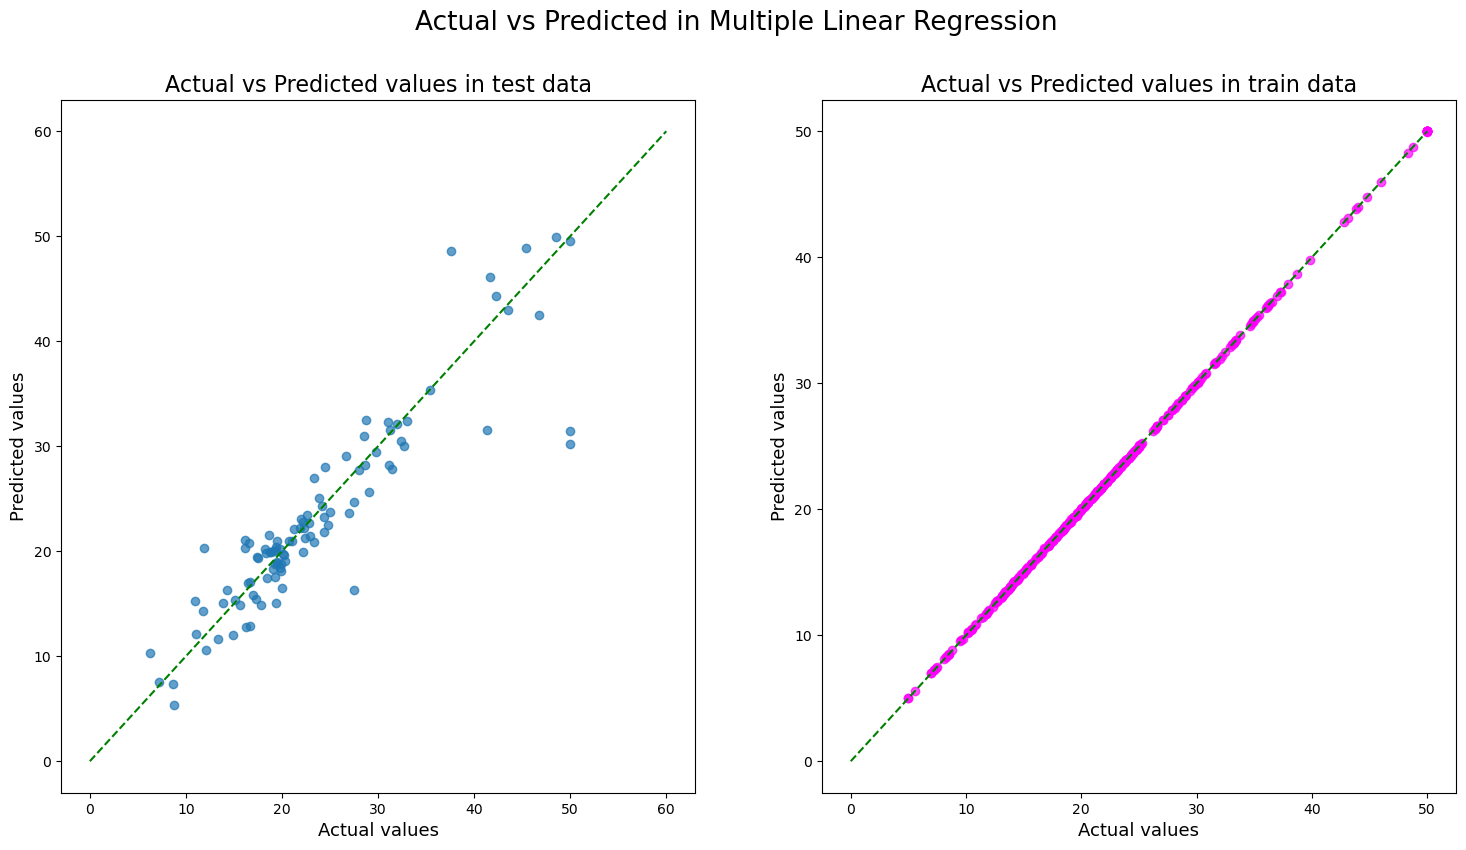

In [377]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_xgbr , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_train, y = y_pred_xgbr_train, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)

Al agual que el modelo de Random Forest con la importancia de variables, al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión, lo cual se puede observar los valores mas cercanos a la linea recta tanto los datas del test y train, infiriendo una mejora en el modelo. Adicionalmente los graficos de dispersión se observan algunos valores atipicos o outliers en el grafico del Test, probalemte esté afectando el overfiting del modelo.

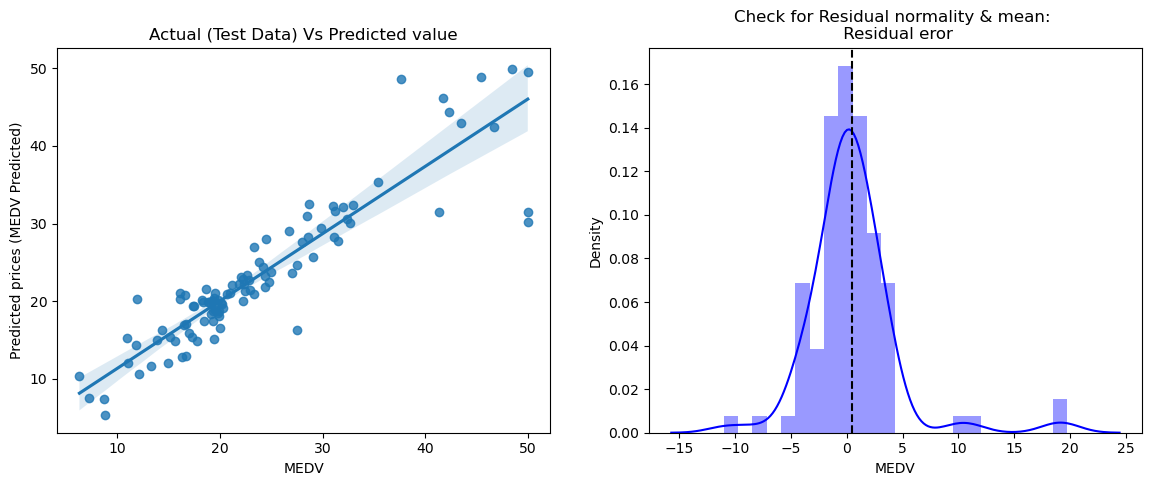

In [378]:
# Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_xgbr, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_xgbr)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Aunque se observa un error medio de 2.41, en la grafica se ve claramente que esta vez los errores están más concentrados alrededor de cero al igual que en las regresión de random forest.

* **Análisis de la importancia de las variables**

XGBoost calcula la importancia de las variables como la ganancia media en todos los nodos en los que se ha usado la variable.

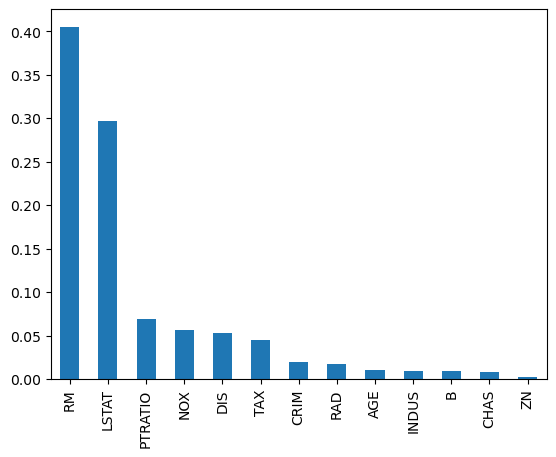

In [379]:
pd.Series(xgbr.feature_importances_,index = x_test.columns).sort_values(ascending = False).plot(kind = 'bar');

* Podemos observar que LSTAT y RM son las características más importantes que se pueden usar para la predicción.

<div class="alert alert-block alert-info">
<b>Ejercicio 2:</b>  Comparar en base al MSE y al R2.
</div>

Se realizó la comparación de los modelos en funcion de los resultados del Test.

In [382]:
# define a function to get the results to a dataframe: 
def get_results(data, predicted): 
    r2_square = metrics.r2_score(data, predicted)
    mse = metrics.mean_squared_error(data, predicted)
    errors = mean_absolute_error(data, predicted)
    return r2_square, mse,errors    

In [397]:
results_df = pd.DataFrame(data = [['Multiple Linear Regression', get_results(y_test, y_pred_rm)[0], 
                        get_results(y_test, y_pred_rm)[1], get_results(y_test, y_pred_rm)[2]], 
                                  ['MLR Regularizacion Ridge', get_results(y_test, y_pred_rid)[0], 
                        get_results(y_test, y_pred_rid)[1], get_results(y_test, y_pred_rid)[2]], 
                                  ['Random Forest Regression', get_results(y_test, y_pred_rFr)[0], 
                        get_results(y_test, y_pred_rFr)[1], get_results(y_test, y_pred_rFr)[2]], 
                                  ['Random Forest Regression IMP', get_results(y_test, yimp_pred_rFr)[0], 
                        get_results(y_test, yimp_pred_rFr)[1], get_results(y_test, yimp_pred_rFr)[2]], 
                                  ['XGBoost Regression', get_results(y_test, y_pred_xgbr)[0], 
                        get_results(y_test, y_pred_xgbr)[1], get_results(y_test, y_pred_xgbr)[2]]],                                  
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

results_df

Model        R2        MSE       MAE
0    Multiple Linear Regression  0.726345  25.419587  3.367791
1      MLR Regularizacion Ridge  0.725817  25.468652  3.332872
2      Random Forest Regression  0.807312  17.898641  2.389667
3  Random Forest Regression IMP  0.819313  16.783830  2.307529
4            XGBoost Regression  0.830522  15.742724  2.417827

Se puede trazar estos resultados en un gráfico para hacer una comparación entre R2:

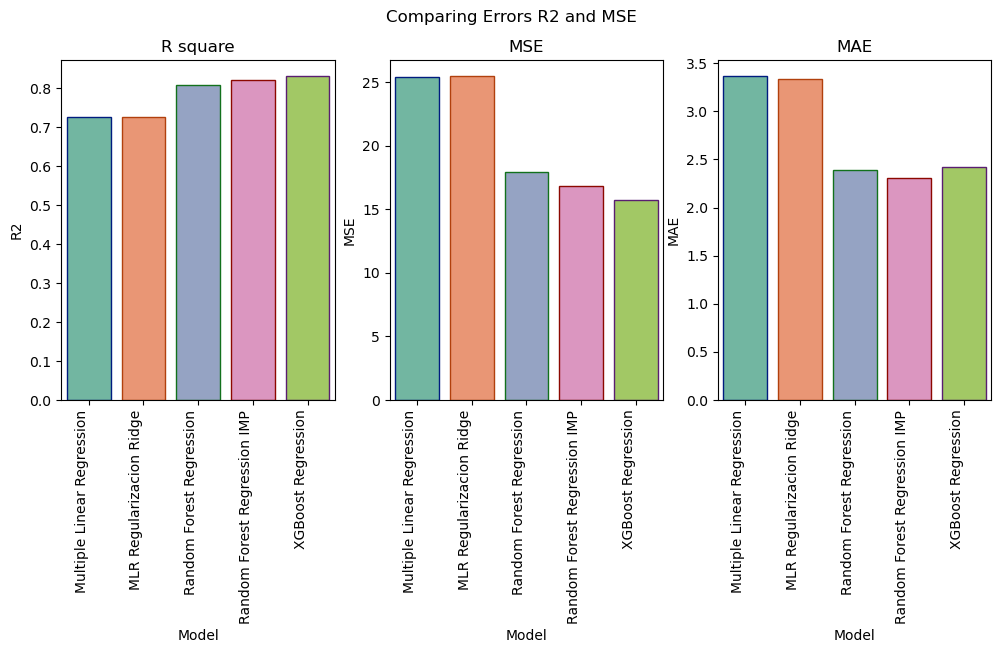

In [411]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

**Observaciones:**

* **Observaciones:**
* Random Forest y XGBoost Regression obtuvieron mejores R2 y MSE que los modelos de Multiple Linear Regression y Ridge. 
* La diferencia entre los errores abosultos de Random Forest y XGBoost Regression es mínima, sin embargo el MAE de Random Forest es menor en comparacion con el XGBoots regression.
* Por orden los siguientes modelos serían: Random Forest (base y imprtancia) y XGBoost Regression. 

<div class="alert alert-block alert-info">
<b>Ejercicio 3:</b> Entrenar utilizando los diferentes parámetros que admiten para intentar mejorar su predicción..
</div>

In [415]:
from pprint import pprint

## Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

De todos los modelos evaluado, los mejores resultados son el Random forest (base e importance) y XGBoost, en este sentido se seleccionaran para ser entrenados.

* **RANDOM FOREST REGRESIÓN**

**Modelo Base**

In [439]:
#parametros de randon forest
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [440]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Ahora se entrenaremos el modelo con los siguientes parametros:

In [446]:
# Parameter grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [447]:
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=3, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
rf_random.fit(x,y)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [449]:
# base model with train data
# Predict with best parameters
rf_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features='auto', max_depth=100, bootstrap= True).fit(x_train, y_train)
y_pred_rf_bp_train = rf_bp.predict(x_train)

evals_test(y_train, y_pred_rf_bp_train)

R2 :  0.9804790038587448
MSE (Error cuadrático medio) :  1.6008834946240593
MAE (Error Absoluto Medio) :  0.8390714727722759


In [450]:
# Predict with best parameters
rf_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features='auto', max_depth=50, bootstrap= True).fit(x_train, y_train)
y_pred_rf_bp = rf_bp.predict(x_test)

evals_test(y_test, y_pred_rf_bp)

R2 :  0.8134173615563539
MSE (Error cuadrático medio) :  17.331516559742678
MAE (Error Absoluto Medio) :  2.349612745098046


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 dl test es mayor que el train y la difrencia entre los dos valores de MAE (train y test) una difrencia que puede sigificar  probablemte existe algo de overfiting o los ouliers en algunas variables pueden estar afectando. 

**Modelo tomando en cuenta la importancia de las variables**

In [468]:
#parametros de randon forest
rfr_imp.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [469]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr_imp.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [470]:
# Parameter grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [471]:
# First create the base model to tune
rfr_imp = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_imp = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=3, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
rf_random_imp.fit(x_imp, y_imp)

rf_random_imp.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [473]:
# base model with train data
# Predict with best parameters
rf_bp_imp = RandomForestRegressor(n_estimators=200,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features= 'sqrt', max_depth=50, bootstrap= True).fit(x_imp_train, y_imp_train)
yimp_pred_rf_bp_train = rf_bp_imp.predict(x_imp_train)

evals_test(y_imp_train, yimp_pred_rf_bp_train)

R2 :  0.9814695290117946
MSE (Error cuadrático medio) :  1.519652221534656
MAE (Error Absoluto Medio) :  0.8273341584158425


In [476]:
# Predict with best parameters
rf_bp_imp = RandomForestRegressor(n_estimators=200,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features= 'sqrt', max_depth=50, bootstrap= True).fit(x_imp_train, y_imp_train)
yimp_pred_rf_bp = rf_bp_imp.predict(x_imp_test)

evals_test(y_test, yimp_pred_rf_bp)

R2 :  0.8799628108979882
MSE (Error cuadrático medio) :  11.150161387254885
MAE (Error Absoluto Medio) :  2.0354999999999976


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 del test es mayor que el train y la difrencia entre los dos valores de MAE (train y test) una difrencia que puede significar probablemte existe algo de overfiting o los ouliers en algunas variables pueden estar afectando.

* **XGBOOST REGRESIÓN**

In [477]:
import xgboost as xgb

In [478]:
# we define the parameters we want to evaluate: 
params = { 'max_depth': [3,5,7,9,12,15,17,25], 'learning_rate': [0.001, 0.01, 0.1, 1.0], 'colsample_bytree': [0.3, 0.7]}

tuned_xgbr = xgb.XGBRegressor()

clf = GridSearchCV(estimator= tuned_xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5}
Lowest RMSE:  3.1983714805960615


In [479]:
xgbr_bp = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 5)

# fit train set 
xgbr_bp.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [480]:
# base model with train data
# Predict with best parameters
y_pred_xgbr_bp_train = xgbr_bp.predict(x_train)

evals_test(y_train, y_pred_xgbr_bp_train)

R2 :  0.995024266368821
MSE (Error cuadrático medio) :  0.4080514019961359
MAE (Error Absoluto Medio) :  0.4842735585599843


In [481]:
# Predict with best parameters Test Data
y_pred_xgbr_bp = xgbr_bp.predict(x_test)

evals_test(y_test, y_pred_xgbr_bp)

R2 :  0.8688558899951568
MSE (Error cuadrático medio) :  12.181874654689004
MAE (Error Absoluto Medio) :  2.0754583246567675


El modelo de XGBOOST aplicando el mejor parametros, al igual que el modelo base, obtuvo una ligera mejora en los R2, sin embargo el train mayor al test y la diferencia entre el MAE test y train aumentaron, por lo que probablemte existe overfiting o los ouliers de las variables pueden estar afectando.

* **Comparación de los modelos en funcion de los resultados del Test**

In [484]:
results_df_2 = pd.DataFrame(data = [['Multiple Linear Regression', get_results(y_test, y_pred_rm)[0], 
                        get_results(y_test, y_pred_rm)[1], get_results(y_test, y_pred_rm)[2]], 
                                  ['MLR Regularizacion Ridge', get_results(y_test, y_pred_rid)[0], 
                        get_results(y_test, y_pred_rid)[1], get_results(y_test, y_pred_rid)[2]], 
                                  ['Random Forest Regression', get_results(y_test, y_pred_rFr)[0], 
                        get_results(y_test, y_pred_rFr)[1], get_results(y_test, y_pred_rFr)[2]], 
                                  ['Random Forest Regression IMP', get_results(y_test, yimp_pred_rFr)[0], 
                        get_results(y_test, yimp_pred_rFr)[1], get_results(y_test, yimp_pred_rFr)[2]], 
                                  ['Random Forest Regression BP', get_results(y_test, y_pred_rf_bp)[0], 
                        get_results(y_test, y_pred_rf_bp)[1], get_results(y_test, y_pred_rf_bp)[2]],
                                  ['Random Forest Regression IMP BP', get_results(y_test, yimp_pred_rf_bp)[0], 
                        get_results(y_test, yimp_pred_rf_bp)[1], get_results(y_test, yimp_pred_rf_bp)[2]],
                                  ['XGBoost Regression', get_results(y_test, y_pred_xgbr)[0], 
                        get_results(y_test, y_pred_xgbr)[1], get_results(y_test, y_pred_xgbr)[2]],  
                                  ['XGBoost Regression BP', get_results(y_test, y_pred_xgbr_bp)[0], 
                        get_results(y_test, y_pred_xgbr_bp)[1], get_results(y_test, y_pred_xgbr_bp)[2]]],                                
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

results_df_2

Model        R2        MSE       MAE
0       Multiple Linear Regression  0.726345  25.419587  3.367791
1         MLR Regularizacion Ridge  0.725817  25.468652  3.332872
2         Random Forest Regression  0.818755  16.835723  2.373108
3     Random Forest Regression IMP  0.835539  15.276686  2.315765
4      Random Forest Regression BP  0.813417  17.331517  2.349613
5  Random Forest Regression IMP BP  0.879963  11.150161  2.035500
6               XGBoost Regression  0.830522  15.742724  2.417827
7            XGBoost Regression BP  0.868856  12.181875  2.075458

Se puede trazar estos resultados en un gráfico para hacer una comparación entre R2:

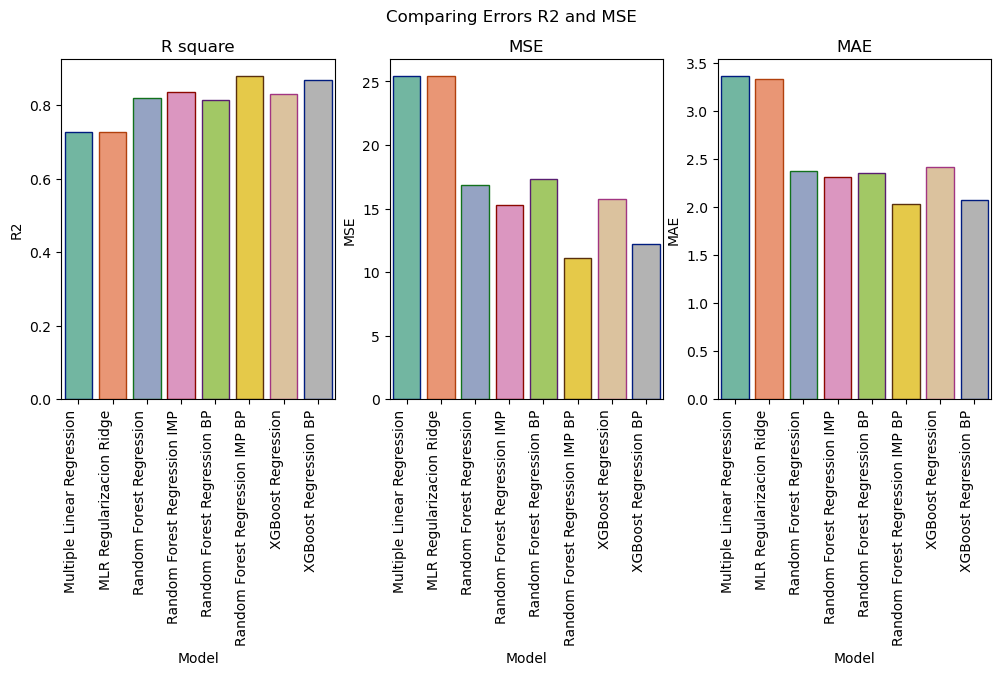

In [485]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results_df_2, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results_df_2, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results_df_2, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

* **Observaciones**
* Random Forest IMP BP (aplicando la importancia de las variables) y XGBoost Regression BP tienen mejores resultados en comparacion que el restos de los modelos, sin embargo sin embargo el MAE y MSE de Random Forest BP IMP es menor en comparacion con el XGBoots regression. 
* Por orden los siguientes modelos serían: Random Forest IMP BP (imprtancia) y XGBoost Regression.

<div class="alert alert-block alert-info">
<b>Ejercicio 4:</b> Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).
</div>

* De todos los modelos evaluado, los mejores resultados son el Random forest y XGBoost, en este sentido se seleccionaran para la validación interna. 
* Para hacer la comparativa de validaciones con los diferentes data sets (todos los datos) del modelo, nuevamente realizaré la instanciación de los modelos seleccionados con los mejores parámetros encontrado.

In [486]:
from sklearn.model_selection import cross_val_score

* **RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [519]:
## Instanciar el modelo con los mejores parametros
rf_cv = RandomForestRegressor(n_estimators = 800, min_samples_split = 2, min_samples_leaf = 1, max_features='auto',
                              max_depth = 50, bootstrap = True, random_state = 42)

In [520]:
# apply cross validation for r2
r2_scores_rfr = cross_val_score(rf_cv, x, y, cv = 5, scoring = 'r2')
r2_rfr =np.mean(r2_scores_rfr).round(4)
print('Métricas: ', r2_scores_rfr)
print ('Media métricas: ', r2_rfr)

Métricas:  [0.7693845  0.86243796 0.73536691 0.47331271 0.29537449]
Media métricas:  0.6272


In [521]:
# apply cross validation for mse
mse_scores_rfr = cross_val_score(rf_cv, x, y, cv=7, scoring='neg_mean_squared_error')
mse_rfr  = abs(np.mean(mse_scores_rfr))
print('Métricas: ', mse_scores_rfr)
print ('Media métricas: ', mse_rfr)

Métricas:  [ -8.5625761   -4.55242656 -19.88980682 -22.26479002  -7.110037
 -77.55303522 -10.72586259]
Media métricas:  21.522647759767285


In [522]:
# apply cross validation for MAE
mae_scores_rfr = cross_val_score(rf_cv, x, y, cv=7, scoring='neg_mean_absolute_error')
mae_rfr  = abs(np.mean(mae_scores_rfr))
print('Métricas: ', mae_scores_rfr)
print ('Media métricas: ', mae_rfr)

Métricas:  [-2.27241096 -1.49792808 -3.57227083 -3.26262674 -2.15271701 -5.76924306
 -2.43897743]
Media métricas:  2.995167730077186


In [538]:
# save it to a dataframe 
rf_results = pd.DataFrame(data = [['Random Forest Regression IMP BP_CV', r2_rfr, mse_rfr, mae_rfr]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rf_results

Model      R2        MSE       MAE
0  Random Forest Regression IMP BP_CV  0.6476  20.805096  2.954002

* **Modelo que incluye la importancia de las variables**

In [542]:
## Instanciar el modelo con los mejores parametros
rf_imp_cv = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features='sqrt',
                              max_depth = 50, bootstrap = True, random_state = 42)

In [544]:
# apply cross validation for r2
r2_scores_rfr_cv = cross_val_score(rf_imp_cv, x_imp, y_imp, cv = 5, scoring = 'r2')
r2_rfr_cv =np.mean(r2_scores_rfr_cv.round(4))
print('Métricas: ', r2_rfr_cv )
print ('Media métricas: ', r2_rfr_cv )

Métricas:  0.6475799999999999
Media métricas:  0.6475799999999999


In [545]:
# apply cross validation for mse
mse_scores_rfr_cv = cross_val_score(rf_imp_cv, x_imp, y_imp, cv=7, scoring='neg_mean_squared_error')
mse_rfr_cv  = abs(np.mean(mse_scores_rfr_cv))
print('Métricas: ', mse_rfr_cv)
print ('Media métricas: ', mse_rfr_cv)

Métricas:  20.805095737222082
Media métricas:  20.805095737222082


In [546]:
# apply cross validation for MAE
mae_scores_rfr_cv = cross_val_score(rf_imp_cv, x_imp, y_imp, cv=7, scoring='neg_mean_absolute_error')
mae_rfr_cv  = abs(np.mean(mae_scores_rfr_cv))
print('Métricas: ', mae_rfr_cv )
print ('Media métricas: ', mae_rfr_cv )

Métricas:  2.954002378234398
Media métricas:  2.954002378234398


In [554]:
# save it to a dataframe 
rf_imp_results = pd.DataFrame(data = [['Random Forest Regression IMP BP_CV', r2_rfr_cv, mse_rfr_cv, mae_rfr_cv]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rf_imp_results

Model       R2        MSE       MAE
0  Random Forest Regression IMP BP_CV  0.64758  20.805096  2.954002

* **XGBOOST REGRESIÓN**

In [533]:
## Instanciar el modelo
xgbr = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 5)

In [534]:
# apply cross validation for r2
r2_scores_xgbr = cross_val_score(xgbr, x, y, cv = 5, scoring = 'r2')
r2_xgbr =np.mean(r2_scores_xgbr).round(4)
print('Métricas: ', r2_scores_xgbr)
print ('Media métricas: ', r2_xgbr)

Métricas:  [0.76513719 0.82437612 0.76470116 0.54044355 0.38726959]
Media métricas:  0.6564


In [535]:
# apply cross validation for mse
mse_scores_xgbr = cross_val_score(xgbr, x, y, cv=7, scoring='neg_mean_squared_error')
mse_xgbr  = abs(np.mean(mse_scores_xgbr))
print('Métricas: ', mse_scores_xgbr)
print ('Media métricas: ', mse_xgbr)

Métricas:  [ -9.1778073   -6.72076542 -20.66381908 -16.08683822  -7.32344334
 -80.39065567 -11.28132898]
Media métricas:  21.663522572311916


In [536]:
# apply cross validation for MAE
mae_scores_xgbr = cross_val_score(xgbr, x, y, cv=7, scoring='neg_mean_absolute_error')
mae_xgbr  = abs(np.mean(mae_scores_xgbr))
print('Métricas: ', mae_scores_xgbr)
print ('Media métricas: ', mae_xgbr)

Métricas:  [-2.47971578 -1.89493638 -3.49907139 -2.79808486 -2.18102963 -5.63309288
 -2.50797182]
Media métricas:  2.999128962962828


In [537]:
# save it to a dataframe 
xgbr_results = pd.DataFrame(data = [['XGBoost Regression BP_CV', r2_xgbr, mse_xgbr, mae_xgbr]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
xgbr_results

Model      R2        MSE       MAE
0  XGBoost Regression BP_CV  0.6564  21.663523  2.999129

* **Comparar los resultados de los modelos seleccionados**

In [555]:
results_df_3 = pd.concat([results_df_2, rfr_results, rf_imp_results, xgbr_results]).reset_index(drop=True)
results_df_3

Model        R2        MSE       MAE
0           Multiple Linear Regression  0.726345  25.419587  3.367791
1             MLR Regularizacion Ridge  0.725817  25.468652  3.332872
2             Random Forest Regression  0.818755  16.835723  2.373108
3         Random Forest Regression IMP  0.835539  15.276686  2.315765
4          Random Forest Regression BP  0.813417  17.331517  2.349613
5      Random Forest Regression IMP BP  0.879963  11.150161  2.035500
6                   XGBoost Regression  0.830522  15.742724  2.417827
7                XGBoost Regression BP  0.868856  12.181875  2.075458
8       Random Forest Regression BP_CV  0.601500  22.294302  3.044194
9   Random Forest Regression IMP BP_CV  0.647580  20.805096  2.954002
10            XGBoost Regression BP_CV  0.656400  21.663523  2.999129

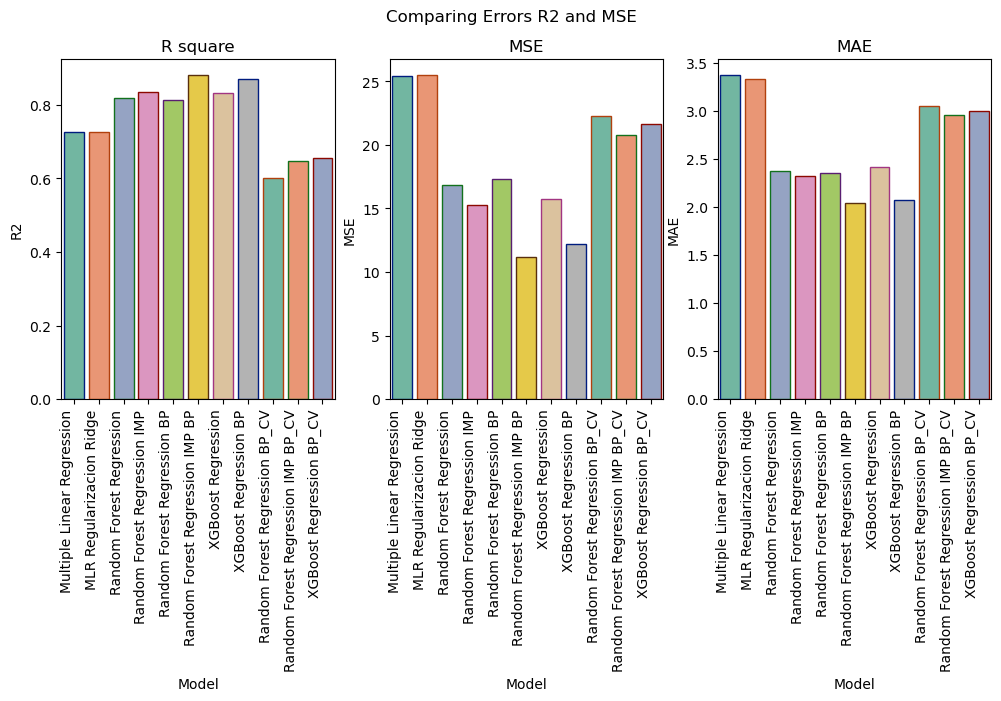

In [556]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

* **Observaciones**
* Random Forest IMP BP (aplicando la importancia de las variables) y XGBoost Regression BP tienen mejores resultados en comparacion que el restos de los modelos, sin embargo sin embargo el MAE y MSE de Random Forest BP IMP es menor en comparacion con el XGBoots regression. 
* Por orden los siguientes modelos serían: Random Forest IMP BP (imprtancia) y XGBoost Regression.

<div class="alert alert-block alert-info">
<b>Ejercicio 5:</b> No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.
</div>

In [558]:
# Make copy of Dataset transf
data_transf_1 = hdata_transf.copy()
data_transf_1

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0   -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1   -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2   -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3   -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4   -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501 -0.053930  0.00  0.420455     0  0.386831  0.521003  0.681771 -0.236007   
502 -0.058759  0.00  0.420455     0  0.386831 -0.119919  0.760041 -0.297887   
503 -0.054450  0.00  0.420455     0  0.386831  1.039973  0.907312 -0.336744   
504 -0.040867  0.00  0.420455     0  0.386831  0.793360  0.889804 -0.265053   
505 -0.058164  0.00  0.420455     0  0.386831 -0.241870  0.802266 -0.227459   

      RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0   -0.20  0.208015 -1.339286  0.261902 -0.637681  24.0  
1   -0.15  0.104962 -0.446429  0.261902 -0.221889  21.6  
2   -0.15  0.104962 -0.446429  0.066675 -0.732634  34.7  
3   -0.10  0.066794 -0.125000  0.153016 -0.841579  33.4  
4   -0.10  0.066794 -0.125000  0.261902 -0.602699  36.2  
..    ...       ...       ...       ...       ...   ...  
501 -0.20  0.164122  0.696429  0.026382 -0.168916  22.4  
502 -0.20  0.164122  0.696429  0.261902 -0.227886  20.6  
503 -0.20  0.164122  0.696429  0.261902 -0.571714  23.9  
504 -0.20  0.164122  0.696429  0.096414 -0.487756  22.0  
505 -0.20  0.164122  0.696429  0.261902 -0.347826  11.9  

[506 rows x 14 columns]

In [559]:
# define new target & features without RM
x1 = data_transf_1.drop(columns = ['MEDV','RM'])
y1 =data_transf_1['MEDV']

In [560]:
# check features
x1.head()

CRIM    ZN     INDUS  CHAS       NOX       AGE       DIS   RAD  \
0 -0.069593  1.44  0.067815     0  0.314815  0.641607  0.285777 -0.20   
1 -0.063755  0.00  0.242302     0  0.172840  0.782698  0.569789 -0.15   
2 -0.063760  0.00  0.242302     0  0.172840  0.599382  0.569789 -0.15   
3 -0.062347  0.00  0.063050     0  0.150206  0.441813  0.924391 -0.10   
4 -0.052144  0.00  0.063050     0  0.150206  0.528321  0.924391 -0.10   

        TAX   PTRATIO         B     LSTAT  
0  0.208015 -1.339286  0.261902 -0.637681  
1  0.104962 -0.446429  0.261902 -0.221889  
2  0.104962 -0.446429  0.066675 -0.732634  
3  0.066794 -0.125000  0.153016 -0.841579  
4  0.066794 -0.125000  0.261902 -0.602699

In [562]:
#Split new target & features without RM
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=4, train_size = 0.80)

print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(404, 12) (102, 12) (404,) (102,)


---

* **Evaluar en función de los modelos seleccionados en el primer ejercicio**

* **N°1: REGRESIÓN LINEAL MÚLTIPLE**

In [568]:
#Instanciar
rm1 = LinearRegression()

#Entrenar
rm1.fit(x1_train, y1_train)

LinearRegression()

In [572]:
#predecir con el train
y1_pred_rm1_train = rm1.predict(x1_train)

In [570]:
#predecir on el test
y1_pred_rm1 = rm1.predict(x1_test)

In [571]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_rm1[:10]

array([10.80435799, 26.39180126, 18.88950337, 19.62401453, 33.47937018,
       24.34796151, 29.37574874, 19.30757261, 16.95123423, 23.55675211])

In [573]:
#Evaluar el modelo con el train
evals_test(y1_train, y1_pred_rm1_train)

R2 :  0.6933129124487136
MSE (Error cuadrático medio) :  25.150883332104822
MAE (Error Absoluto Medio) :  3.525896253473008


In [574]:
#Evaluar el modelo con el test
evals_test(y1_test, y1_pred_rm1)

R2 :  0.6946688825980112
MSE (Error cuadrático medio) :  28.36197066135718
MAE (Error Absoluto Medio) :  3.827538635046298


El valor del R2 del test es menorr que el del train, al igual que los modelos evaluados incluyendo la variable RM. Es probablemente no exista overfitting, existan alguna cantidad excesiva de Dimensiones (features), con muchas variantes distintas, sin suficientes muestras o los altos valores de outliers que aun presentan este afectando los resultados. Sin embargo se continuará evaluando otros modelos para verificar si exisa alguna mejora.

* **Modelo N°2: Ridge Regression**

In [576]:
#Instanciar
ridge = Ridge()

#Entrenar
ridge.fit(x1_train, y1_train)

Ridge()

* **Predecir el modelo**

In [577]:
# Model prediction on train data
y1_pred_rid_train = ridge.predict(x1_train)

In [578]:
# Model prediction on test data
y1_pred_rid = ridge.predict(x1_test)

In [579]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_rid[:10]

array([10.66969156, 26.16599397, 19.02872663, 19.16958685, 33.15463693,
       24.30223469, 29.16940696, 19.02380994, 16.57662474, 24.15374675])

In [581]:
prediccion = pd.DataFrame(y1_pred_rid, columns = ['PREDICCION'])
prediccion.head()

PREDICCION
0   10.669692
1   26.165994
2   19.028727
3   19.169587
4   33.154637

In [582]:
# Model Evaluation on train data
evals_test(y1_train,y1_pred_rid_train)

R2 :  0.6923516307772222
MSE (Error cuadrático medio) :  25.22971639730497
MAE (Error Absoluto Medio) :  3.5118502494349926


In [583]:
# Model Evaluation on test data
evals_test(y1_test, y1_pred_rid)

R2 :  0.6925620325926645
MSE (Error cuadrático medio) :  28.557674324147808
MAE (Error Absoluto Medio) :  3.7957899721781923


Se obtuvo el mismo puntaje r2 que en el modelo de regresion lineal multiple, probablemente no exista overfitting, existan alguna cantidad excesiva de Dimensiones (features), con muchas variantes distintas, sin suficientes muestras o los altos valores de outliers que aun presentan este afectando los resultados. Sin embargo se continuará evaluando otros modelos para verificar si exisa alguna mejora. 

* **Modelo N°3: RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [589]:
#Instanciar
rfr1 = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr1.fit(x1_train,y1_train)

RandomForestRegressor(random_state=42)

In [593]:
#predecir el modelo con el train
y1_pred_rFr1_train = rfr1.predict(x1_train)

In [594]:
#predecir el modelo con el test
y1_pred_rFr1 = rfr1.predict(x1_test)

In [595]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_rFr1[:10]

array([17.905, 21.876, 19.516, 19.467, 46.319, 23.807, 28.784, 17.868,
       15.064, 16.116])

In [598]:
#Evaluar el modelo con el train
evals_test(y1_train, y1_pred_rFr1_train)

R2 :  0.9727032312867581
MSE (Error cuadrático medio) :  2.2385612995049504
MAE (Error Absoluto Medio) :  1.0550173267326726


In [599]:
#Evaluar el modelo con el test
evals_test(y1_test, y1_pred_rFr1)

R2 :  0.8533659133674961
MSE (Error cuadrático medio) :  13.62072656862747
MAE (Error Absoluto Medio) :  2.6989019607843154


El valor del R2 del test es menor que el del train, al igual que los modelos evaluados incluyendo la variable RM.

* **Análisis de la importancia de las variables**

RF calcula la importancia de las variables con el criterio de "decremento medio de la impureza", qué básicamente le das más valor a las variables que consiguen aumentar la pureza de los nodos. A menudo se usan para la selección de características en un flujo de trabajo de ciencia de datos. 

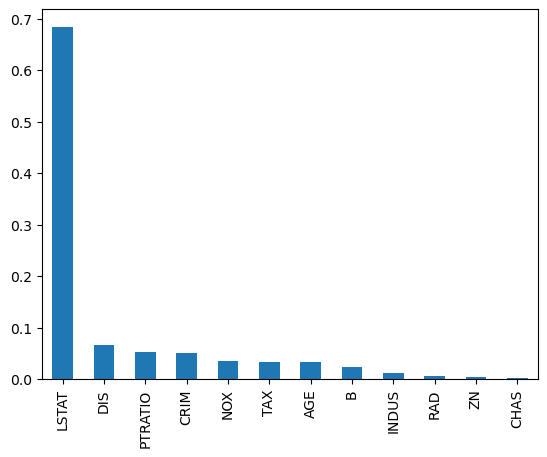

In [600]:
rfc1_importances = pd.Series(rfr1.feature_importances_, index=data_transf_1.drop(columns = ['MEDV','RM']).columns).sort_values(ascending = False)
rfc1_importances.plot(kind='bar')
plt.show()

Podemos observar claramente que LSTAT es las características más importantes que se pueden usar para la predicción. Asi como las variables CRIM, B, INDUS, CHAS RAD y ZN no tienen gran importancia en la hora del modelajes, se pudiera evaluar el modelo sin tomar en cuenta algunas de estas variables, que coincen con tener altos valores de outliers como es el caso de las variables CRIM, B, RAD y ZN.

* **RANDOM FOREST REGRESIÓN aplicando la importancia** 

De acuerdo a los resultados de la importancia de las varaibles, se evaluará el modelo sin tomar en cuenta las variables: CRIM, B, RAD y ZN.

In [618]:
x1_imp =  data_imp.drop(columns = ['RM', 'CRIM', 'B', 'RAD', 'ZN', 'MEDV'])

In [619]:
y1_imp = data_imp['MEDV']

* **Train y test**

In [621]:
x1_imp_train, x1_imp_test, y1_imp_train, y1_imp_test = train_test_split(x1_imp, y1_imp , random_state=4, train_size=0.80)
print(x1_imp_train.shape, x1_imp_test.shape, y1_imp_train.shape, y1_imp_test.shape)

(404, 8) (102, 8) (404,) (102,)


* **Entrenar el modelo**

In [623]:
#Instanciar
rfr_imp1 = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr_imp1.fit(x1_imp_train, y1_imp_train)

RandomForestRegressor(random_state=42)

* **Predecir el modelo**

In [625]:
# Model prediction on train data
yimp_pred_rFr_train1 = rfr_imp1.predict(x1_imp_train)

In [626]:
# Model prediction on train data
yimp_pred_rFr1 = rfr_imp1.predict(x1_imp_test)

In [627]:
# los 10 primeros valores de MEDV (y_pred)
yimp_pred_rFr1[:10]

array([19.732, 22.344, 19.167, 19.959, 47.317, 24.215, 28.669, 17.313,
       16.033, 15.403])

* **Evaluar el modelo con respecto al test data**

In [628]:
# Model Evaluation on train data
evals_test(y1_imp_train, yimp_pred_rFr_train1)

R2 :  0.9725219381544261
MSE (Error cuadrático medio) :  2.2534288391089112
MAE (Error Absoluto Medio) :  1.0383094059405933


In [629]:
# Model Evaluation on test data
evals_test(y1_imp_test, yimp_pred_rFr1)

R2 :  0.8462903973345983
MSE (Error cuadrático medio) :  14.2779657647059
MAE (Error Absoluto Medio) :  2.779137254901962


El modelo de Randon forest tomando en cuenta los resultados de las importancia de las variables, se obtuvo una ligera mejora en los R2, sin embargo el train mayor al test, aunque la diferencia entre el MAE test y train disminuyo un poco, por lo que probablemte existe algo de overfiting o los ouliers de las variables LAST pueden estar afectando.

* **Modelo N°4: XGBOOST REGRESIÓN**

In [630]:
#Instanciar
xgbr1 = XGBRegressor (use_label_encoder=False) #lo del encoder es para que no de warning

#Entrenar
xgbr1.fit(x1_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [636]:
#Predecir el modelo para el train
y1_pred_xgbr1_train = xgbr1.predict(x1_train)

In [637]:
#Predecir el modelo para el test
y1_pred_xgbr1 = xgbr1.predict(x1_test)

In [638]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_xgbr1[:10]

array([18.773447, 21.792822, 18.956772, 20.125252, 49.445194, 23.910366,
       30.708763, 19.457657, 15.318009, 15.049083], dtype=float32)

In [640]:
#Evaluar el modelo del Train
evals_test(y1_train, y1_pred_xgbr1_train)

R2 :  0.9999758173200726
MSE (Error cuadrático medio) :  0.0019831802061482827
MAE (Error Absoluto Medio) :  0.030942116633500136


In [641]:
#Evaluar el modelo del Test
evals_test(y1_test, y1_pred_xgbr1)

R2 :  0.7921973745777078
MSE (Error cuadrático medio) :  19.302624690625976
MAE (Error Absoluto Medio) :  2.995915456846649


* **Observaciones**

* **Comparar los modelos** 

In [662]:
results1_df = pd.DataFrame(data = [['Multiple Linear Regression/RM', get_results(y1_test, y1_pred_rm1)[0], 
                        get_results(y_test, y_pred_rm)[1], get_results(y1_test, y1_pred_rm1)[2]], 
                                   ['Ridges Regression/RM', get_results(y1_test, y1_pred_rid)[0], 
                        get_results(y1_test, y1_pred_rid)[1], get_results(y1_test, y1_pred_rid)[2]],
                                  ['Random Forest Regression/RM', get_results(y1_test, y1_pred_rFr1)[0], 
                        get_results(y_test, y_pred_rFr)[1], get_results(y1_test, y1_pred_rFr1)[2]], 
                                   ['Random Forest Regression/RM IMP', get_results(y1_imp_test, yimp_pred_rFr1)[0], 
                        get_results(y1_imp_test, yimp_pred_rFr1)[1], get_results(y1_imp_test, yimp_pred_rFr1)[2]],
                                  ['XGBoost Regression/RM', get_results(y1_test, y1_pred_xgbr1)[0], 
                        get_results(y_test, y_pred_xgbr)[1], get_results(y1_test, y1_pred_xgbr1)[2]]], 
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

results1_df

Model        R2        MSE       MAE
0    Multiple Linear Regression/RM  0.694669  25.419587  3.827539
1             Ridges Regression/RM  0.692562  28.557674  3.795790
2      Random Forest Regression/RM  0.853366  16.835723  2.698902
3  Random Forest Regression/RM IMP  0.846290  14.277966  2.779137
4            XGBoost Regression/RM  0.792197  15.742724  2.995915

Se puede trazar estos resultados en un gráfico para hacer una comparación entre R2:

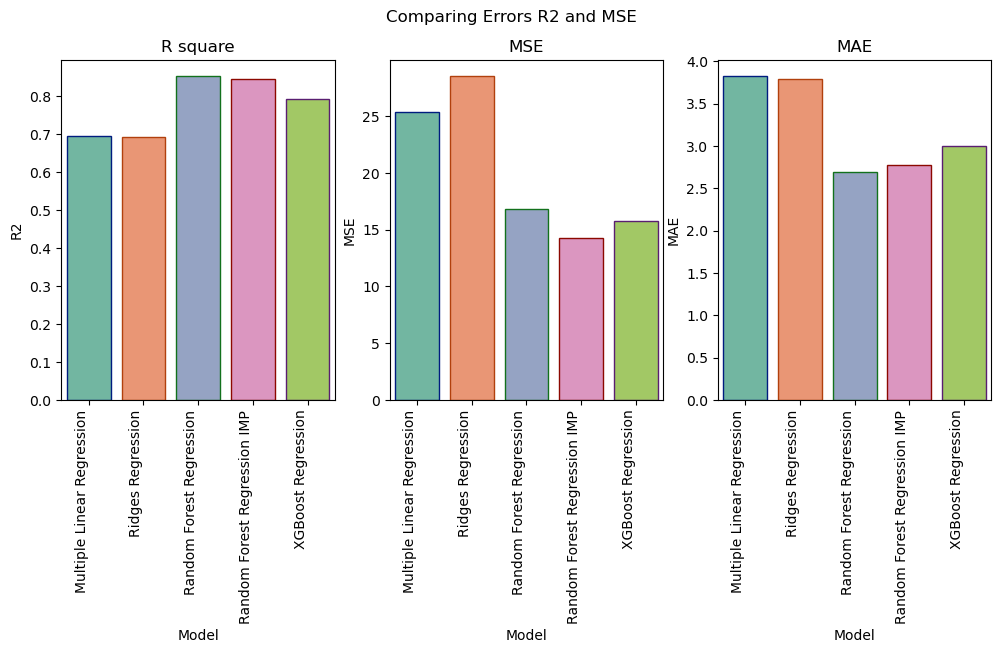

In [644]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results1_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results1_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results1_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

* **Observaciones**

---

* **Entrenar el modelo utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.**

De todos los modelos evaluado sin la variable RM, el mejor resultado obtenido fue el de Random forest (base e importancia de variables), en este sentido se seleccionará buscar los mejores parametros y si es posible mejorarar su predicción.

**RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [645]:
#parametros de randon forest
rfr1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [646]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr1.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Ahora se entrenará el modelo con los siguientes parámetros:

In [647]:
# Parameter grid
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rfr1 = RandomForestRegressor(random_state = 42)

rfr1_random = RandomizedSearchCV(estimator = rfr1,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rfr1_random.fit(x1,y1.values.ravel())

rfr1_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [649]:
# base model with train data
# Predict with best parameters
rf1_bp = RandomForestRegressor(n_estimators=600,random_state = 42, min_samples_split=10, min_samples_leaf=2, 
                               max_features='auto', max_depth=100, bootstrap= True).fit(x1_train, y1_train)
y1_pred_rf_bp_train = rf1_bp.predict(x1_train)

evals_test(y_train, y1_pred_rf_bp_train)

R2 :  0.9236503385947802
MSE (Error cuadrático medio) :  6.26130510345425
MAE (Error Absoluto Medio) :  1.7085987653427672


In [650]:
# Predict with best parameters
rf1_bp = RandomForestRegressor(n_estimators=600,random_state = 42, min_samples_split=10, min_samples_leaf=2, 
                              max_features='auto', max_depth=100, bootstrap= True).fit(x1_train, y1_train)
y1_pred_rf1_bp = rf1_bp.predict(x1_test)

evals_test(y1_test, y1_pred_rf1_bp)

R2 :  0.8385082365502659
MSE (Error cuadrático medio) :  15.000844643626753
MAE (Error Absoluto Medio) :  2.8064852035129033


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 y la diferencia entre los dos valores de MAE (train y test) una difrencia  menor con respecto el resto de los modelos evaluados. 

**Modelo tomando en cuenta la importancia de las variables**

In [652]:
#parametros de randon forest
rfr_imp1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [653]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr_imp1.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [654]:
# Parameter grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [661]:
# First create the base model to tune
rfr_imp1 = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_imp1 = RandomizedSearchCV(estimator = rfr_imp1,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=3, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
rf_random_imp1.fit(x1_imp, y1_imp)

rf_random_imp1.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [663]:
# base model with train data
# Predict with best parameters
rf_bp_imp1 = RandomForestRegressor(n_estimators=600,random_state = 42, min_samples_split=10, min_samples_leaf=2, 
                               max_features= 'auto', max_depth=100, bootstrap= True).fit(x1_imp_train, y1_imp_train)

yimp_pred_rf_bp_train1 = rf_bp_imp1.predict(x1_imp_train)

evals_test(y1_imp_train, yimp_pred_rf_bp_train1)

R2 :  0.9170652545048953
MSE (Error cuadrático medio) :  6.801336583094217
MAE (Error Absoluto Medio) :  1.7856123488076066


In [664]:
# Predict with best parameters
rf_bp_imp1 = RandomForestRegressor(n_estimators=600,random_state = 42, min_samples_split=10, min_samples_leaf=2, 
                               max_features= 'auto', max_depth=50, bootstrap= True).fit(x1_imp_train, y1_imp_train)

yimp_pred_rf_bp1 = rf_bp_imp1.predict(x1_imp_test)

evals_test(y1_test, yimp_pred_rf_bp1)

R2 :  0.8353878968648449
MSE (Error cuadrático medio) :  15.290690576672814
MAE (Error Absoluto Medio) :  2.860872607477596


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 del test es mayor que el train y la difrencia entre los dos valores de MAE (train y test) una difrencia que puede significar probablemte existe algo de overfiting o los ouliers en algunas variables pueden estar afectando.

* **Comparar los modelos** 

In [667]:
results1_df2 = pd.DataFrame(data = [['Random Forest Regression/R BP', get_results(y1_test, y1_pred_rf1_bp)[0], 
                        get_results(y1_test, y1_pred_rf1_bp)[1], get_results(y1_test, y1_pred_rf1_bp)[2]], 
                                  ['Random Forest Regression/R IMP BP', get_results(y1_test, yimp_pred_rf_bp1)[0], 
                        get_results(y1_test, yimp_pred_rf_bp1)[1], get_results(y1_test, yimp_pred_rf_bp1)[2]]], 
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

In [668]:
results1_df_3 = pd.concat([results1_df, results1_df2]).reset_index(drop=True)
results1_df_3

Model        R2        MSE       MAE
0      Multiple Linear Regression/RM  0.694669  25.419587  3.827539
1               Ridges Regression/RM  0.692562  28.557674  3.795790
2        Random Forest Regression/RM  0.853366  16.835723  2.698902
3    Random Forest Regression/RM IMP  0.846290  14.277966  2.779137
4              XGBoost Regression/RM  0.792197  15.742724  2.995915
5      Random Forest Regression/R BP  0.838508  15.000845  2.806485
6  Random Forest Regression/R IMP BP  0.835388  15.290691  2.860873

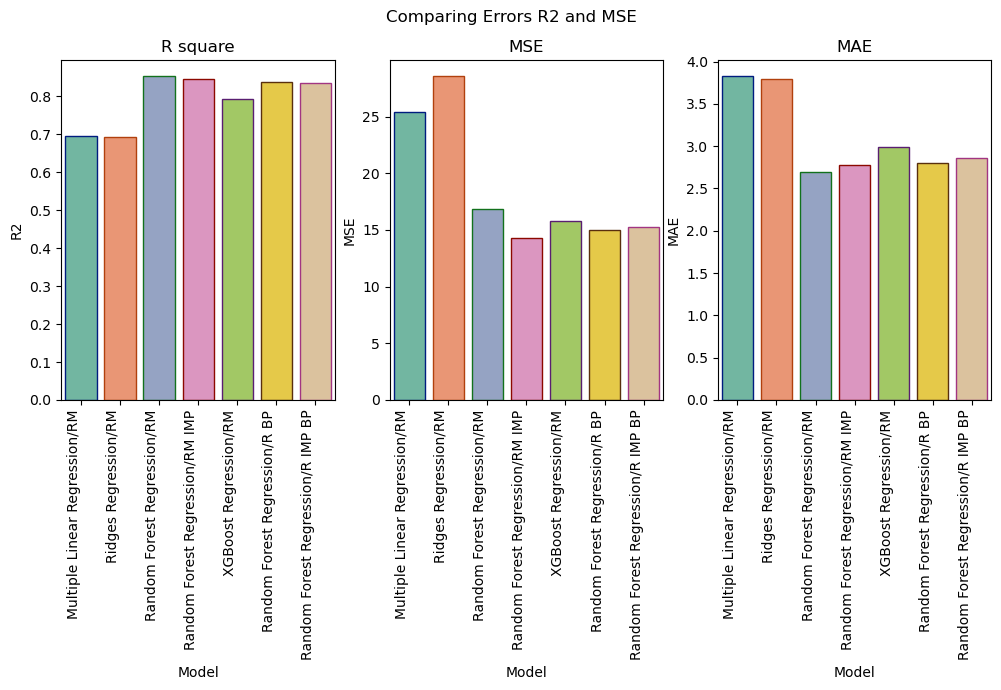

In [669]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

---

* **Aplicar crossvalidation (validación interna).**

   * De todos los modelos evaluado, el mejor resultado fue el Random forest , en este sentido se seleccionaran para la validación interna.
   * Para hacer la comparativa de validaciones con los diferentes data sets (todos los datos) del modelo, nuevamente realizaré la instanciación de los modelos seleccionados con los mejores parámetros encontrado.

**RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [670]:
## Instanciar el modelo con los mejores parametros
rfr1 = RandomForestRegressor(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features='auto', 
                             max_depth=100, bootstrap = True, random_state = 42)

In [677]:
# apply cross validation for r2
r2_scores_rfr1 = cross_val_score(rfr1, x1, y1, cv = 7, scoring = 'r2')
r2_rfr1 =np.mean(r2_scores_rfr1).round(4)
print('Métricas: ', r2_scores_rfr1)
print ('Media métricas: ', r2_rfr1)

Métricas:  [0.6492686  0.81709927 0.43275675 0.65500695 0.40297669]
Media métricas:  0.5914


In [679]:
# apply cross validation for mse
mse_scores_rfr1 = cross_val_score(rfr1, x1, y1, cv=7, scoring='neg_mean_squared_error')
mse_rfr1  = abs(np.mean(mse_scores_rfr1))
print('Métricas: ', mse_scores_rfr1)
print ('Media métricas: ', mse_rfr1)

Métricas:  [-12.11257745 -16.65068873 -45.42892528 -30.25997909 -15.8738449 ]
Media métricas:  24.065203090049543


In [680]:
# apply cross validation for MAE
mae_scores_rfr1 = cross_val_score(rfr1, x1, y1, cv=7, scoring='neg_mean_absolute_error')
mae_rfr1  = abs(np.mean(mae_scores_rfr1))
print('Métricas: ', mae_scores_rfr1)
print ('Media métricas: ', mae_rfr1)

Métricas:  [-3.1290826  -1.61105176 -4.24089296 -5.51016426 -3.54462983 -4.41663326
 -2.37233997]
Media métricas:  3.5463992348941926


In [697]:
# save it to a dataframe 
rfr1_results = pd.DataFrame(data = [['Random Forest Regression/RM BP_CV', r2_rfr1, mse_rfr1, mae_rfr1]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rfr1_results

Model      R2        MSE       MAE
0  Random Forest Regression/RM BP_CV  0.5914  24.065203  3.546399

* **Modelo que incluye la importancia de las variables**

In [714]:
## Irf_bp_imp1nstanciar el modelo con los mejores parametros
rf_bp_imp1 = RandomForestRegressor(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features='auto',
                              max_depth = 100, bootstrap = True, random_state = 42)

In [715]:
# apply cross validation for r2
r2_scores_rfr_cv_imp = cross_val_score(rf_bp_imp1, x1_imp, y1_imp, cv = 7, scoring = 'r2')
r2_rfr_cv_imp =np.mean(r2_scores_rfr_cv.round(4))
print('Métricas: ', r2_scores_rfr_cv_imp )
print ('Media métricas: ',r2_rfr_cv_imp )

Métricas:  [0.59021703 0.78008205 0.71720019 0.36446842 0.12892285 0.63866353
 0.44184848]
Media métricas:  0.6475799999999999


In [716]:
# apply cross validation for mse
mse_scores_rfr_cv_imp = cross_val_score(rf_bp_imp1, x1_imp, y1_imp, cv=7, scoring='neg_mean_squared_error')
mse_rfr_cv_imp  = abs(np.mean(mse_scores_rfr_cv))
print('Métricas: ', mse_scores_rfr_cv_imp)
print ('Media métricas: ', mse_rfr_cv_imp)

Métricas:  [-13.37104385  -5.96392717 -28.27140478 -54.9909281  -19.11868995
 -41.38946934 -12.03450483]
Media métricas:  20.805095737222082


In [717]:
# apply cross validation for MAE
mae_scores_rfr_cv = cross_val_score(rf_bp_imp1, x1_imp, y1_imp, cv=7, scoring='neg_mean_absolute_error')
mae_rfr_cv_imp  = abs(np.mean(mae_scores_rfr_cv))
print('Métricas: ', mae_scores_rfr_cv)
print ('Media métricas: ', mae_rfr_cv_imp )

Métricas:  [-2.99947712 -1.89938716 -4.13757255 -5.59523554 -3.41574012 -4.50686134
 -2.49283466]
Media métricas:  3.578158356086805


In [718]:
# save it to a dataframe 
rf_imp_results_imp = pd.DataFrame(data = [['Random Forest Regression/RM IMP BP_CV', r2_rfr_cv_imp, mse_rfr_cv_imp, mae_rfr_cv_imp]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rf_imp_results_imp

Model       R2        MSE       MAE
0  Random Forest Regression/RM IMP BP_CV  0.64758  20.805096  3.578158

* **Comparar los modelos** 

In [719]:
results1_df_4 = pd.concat([results1_df_3, rfr1_results, rf_imp_results_imp]).reset_index(drop=True)
results1_df_4

Model        R2        MSE       MAE
0          Multiple Linear Regression/RM  0.694669  25.419587  3.827539
1                   Ridges Regression/RM  0.692562  28.557674  3.795790
2            Random Forest Regression/RM  0.853366  16.835723  2.698902
3        Random Forest Regression/RM IMP  0.846290  14.277966  2.779137
4                  XGBoost Regression/RM  0.792197  15.742724  2.995915
5          Random Forest Regression/R BP  0.838508  15.000845  2.806485
6      Random Forest Regression/R IMP BP  0.835388  15.290691  2.860873
7      Random Forest Regression/RM BP_CV  0.591400  24.065203  3.546399
8  Random Forest Regression/RM IMP BP_CV  0.647580  20.805096  3.578158

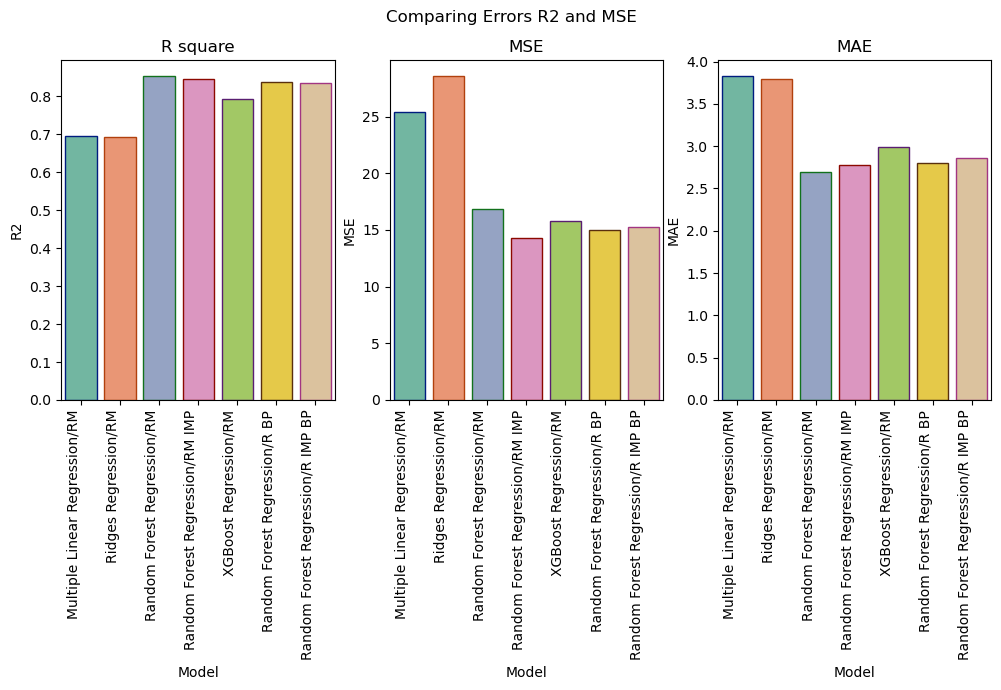

In [720]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

---

* **Comparar los modelos con y sin la variable RM** 

In [713]:
results_final = pd.concat([results_df_3, results1_df_4]).reset_index(drop=True)
results_final

Model        R2        MSE       MAE
0              Multiple Linear Regression  0.726345  25.419587  3.367791
1                MLR Regularizacion Ridge  0.725817  25.468652  3.332872
2                Random Forest Regression  0.818755  16.835723  2.373108
3            Random Forest Regression IMP  0.835539  15.276686  2.315765
4             Random Forest Regression BP  0.813417  17.331517  2.349613
5         Random Forest Regression IMP BP  0.879963  11.150161  2.035500
6                      XGBoost Regression  0.830522  15.742724  2.417827
7                   XGBoost Regression BP  0.868856  12.181875  2.075458
8          Random Forest Regression BP_CV  0.601500  22.294302  3.044194
9      Random Forest Regression IMP BP_CV  0.647580  20.805096  2.954002
10               XGBoost Regression BP_CV  0.656400  21.663523  2.999129
11          Multiple Linear Regression/RM  0.694669  25.419587  3.827539
12                   Ridges Regression/RM  0.692562  28.557674  3.795790
13            Random Forest Regression/RM  0.853366  16.835723  2.698902
14        Random Forest Regression/RM IMP  0.846290  14.277966  2.779137
15                  XGBoost Regression/RM  0.792197  15.742724  2.995915
16          Random Forest Regression/R BP  0.838508  15.000845  2.806485
17      Random Forest Regression/R IMP BP  0.835388  15.290691  2.860873
18      Random Forest Regression/RM BP_CV  0.591400  24.065203  3.546399
19  Random Forest Regression/RM IMP BP_CV  0.647580  20.805096  3.578158

**Conclusiones:**

* Los mejores resultados se obtuvieron con el algoritmo de Randon Forest regression, tanto para los modelos con la variables RM como con los modelos sin esta. 
* Al buscar los mejores parámetros se pudo observar una mejora en el R2 y una disminución entre el MAE de test y train. 
* Al aplicar Cross validatios los valores de R2 bajaron drasticamente por debajo de los 0.66, pudiendose inferir que hay algun fallo en el pre-procesamiento de los atributos o es posible que faltan más datos para entrenar o evluar el modelo o hay una sobre dimension de las variables independintes.
* Es importante resaltar, que una vez aplicado el robuscaler para minimizar los outliers, los mismos no mejoraron sigficativamente, lo que pudiera estar afectando los resultados obtenidos.

<div class="alert alert-success">
  <strong>Recomendaciones:</strong> En general, se puede observar algun fallo en el pre-procesamiento de los datos o alguna sobredimesión de las variables a utilizar para predecir los modelos, en este sentido se recomienda:
    * Revisar la simetria​ de algunas variables, aplicando un tipo de transformación, previo la normalizacion de los atributos a utilizar. 
    * Si una vez aplicado un tipo de transformacion para la correción de simetria y se aplica la normalización de los outlieres, persiste un alto % de los mismo, es recomedable realizar algun tipo de imputación, bien sea usando la media o el perceltil mayor.
    * Revisar los valores usado para el train y test asi como los valores a iterar en el crossvalidation.
</div>